# Unidade 02 - Trabalho Extra

- **Alunos**: Janeto Erick da Costa Lima e Júlio César da Costa Morais


- **Inicialmente, vamos importar as bibliotecas a serem utilizadas, e, posteriormente ler todos os datasets de ingresantes na UFRN de 2009 até o ano de 2019.**




In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nine = pd.read_csv("discentes-2009.csv", sep=";")
ten = pd.read_csv("discentes-2010.csv", sep=";")
eleven = pd.read_csv("discentes-2011.csv", sep=";")
twelve = pd.read_csv("discentes-2012.csv", sep=";")
thirteen = pd.read_csv("discentes-2013.csv", sep=";")
fourteen = pd.read_csv("discentes-2014.csv", sep=";")
fiveteen = pd.read_csv("discentes-2015.csv", sep=";")
sixteen = pd.read_csv("discentes-2016.csv", sep=";")
seventeen = pd.read_csv("discentes-2017.csv", sep=";")
eighteen = pd.read_csv("discentes-2018.csv", sep=";")
nineteen = pd.read_csv("discentes-2019.csv", sep=";")

- **Agora, vamos juntar todos os datasets de 2009 até 2019, e formar um só, e também eliminar as linhas nulas do novo dataset.**


In [0]:
dataset = pd.concat([nine, ten, eleven, twelve, thirteen, fourteen, fiveteen, sixteen, seventeen, eighteen, nineteen])

dataset = dataset.dropna()

- **Com um dataset único criado, vamos agora selecionar todos os estudantes de graduação, e listar todos os cursos a serem analisados (Cursos selecionados estão todos no arquivo README.txt).**

In [0]:
dataset_graduation = dataset.loc[dataset['nivel_ensino'] == 'GRADUAÇÃO']
courses = ['BIOMEDICINA', 'CIÊNCIAS BIOLÓGICAS', 'ECOLOGIA', 'AQUICULTURA', 'ENGENHARIA DE AQUICULTURA', 'MEDICINA', 'ODONTOLOGIA', 'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'ENFERMAGEM', 'FÍSICA', 'MATEMÁTICA', 'QUÍMICA', 'ESTATÍSTICA', 'GEOLOGIA', 'PSICOLOGIA', 'CIÊNCIAS SOCIAIS', 'HISTÓRIA', 'DANÇA', 'DESIGN', 'CIÊNCIAS CONTÁBEIS', 'DIREITO', 'SERVIÇO SOCIAL', 'ADMINISTRAÇÃO', 'TURISMO', 'PEDAGOGIA', 'ENGENHARIA CIVIL', 'ENGENHARIA ELÉTRICA', 'ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA QUÍMICA', 'ARQUITETURA E URBANISMO', 'TECNOLOGIA DA INFORMAÇÃO', 'CIÊNCIAS E TECNOLOGIA']
graduation = dataset_graduation.loc[dataset_graduation['nome_curso'].isin(courses)]

- **O Curso de Engenharia da Aquicultura aparece tanto como ENGENHARIA DA AQUICULTURA como AQUICULTAURA, logo, vamos colocar ele como um só, e depois, remover as linhas onde o sexo/raça do discente não é informado.**


In [0]:
graduation['nome_curso'] = graduation['nome_curso'].replace({'AQUICULTURA':'ENGENHARIA DE AQUICULTURA'})
courses.remove('AQUICULTURA')

graduation_sex = graduation.loc[graduation['sexo'] != 'N']
graduation_raca = graduation.loc[graduation['raca'] != 'Não Informado']

- **Agora, vamos fazer a analise das etnias dos ingressantes nos cursos de graduação selecionados a parte, e um gráfico geral.**


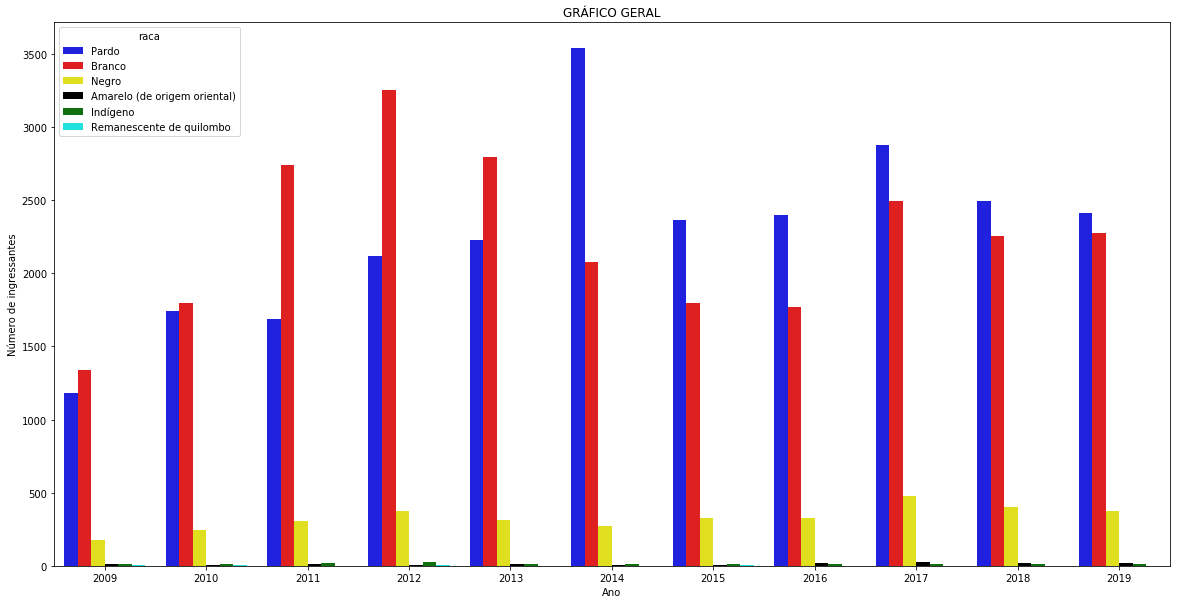

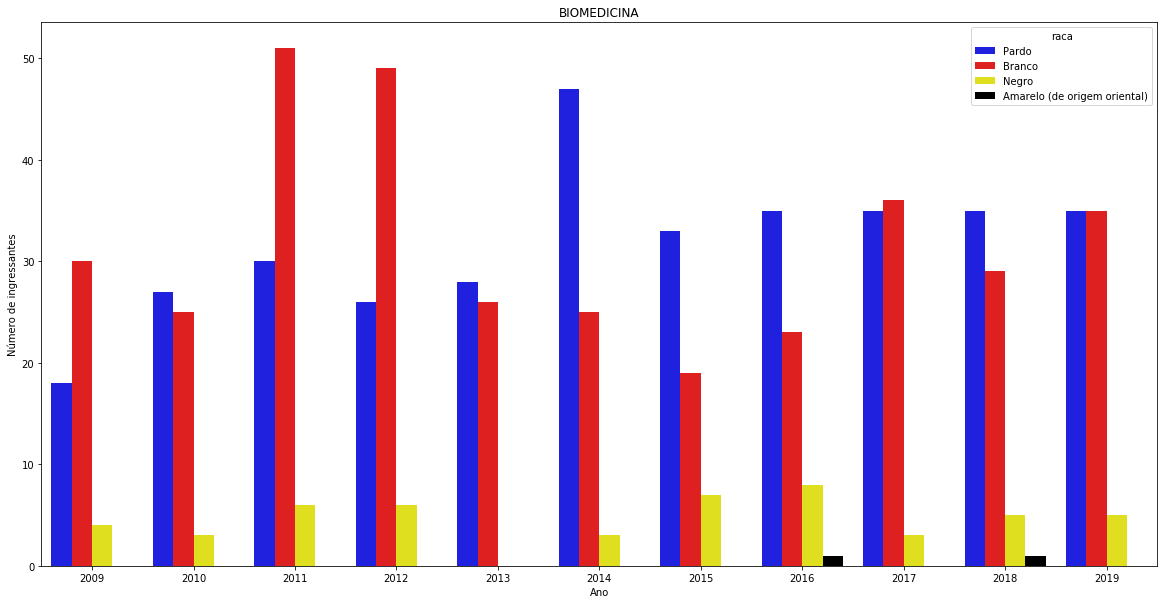

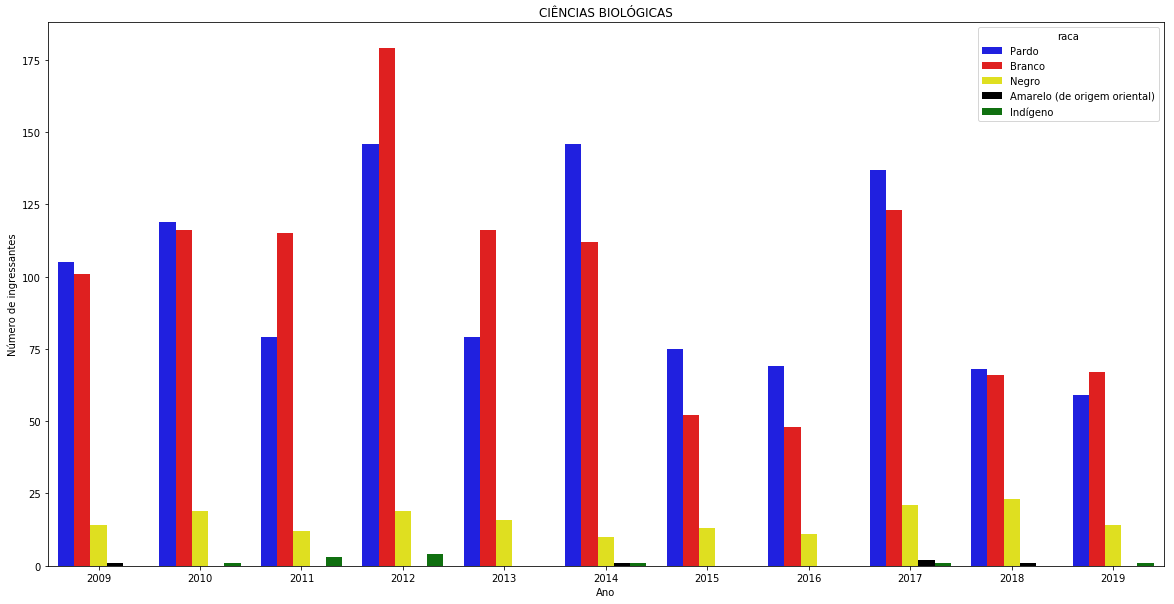

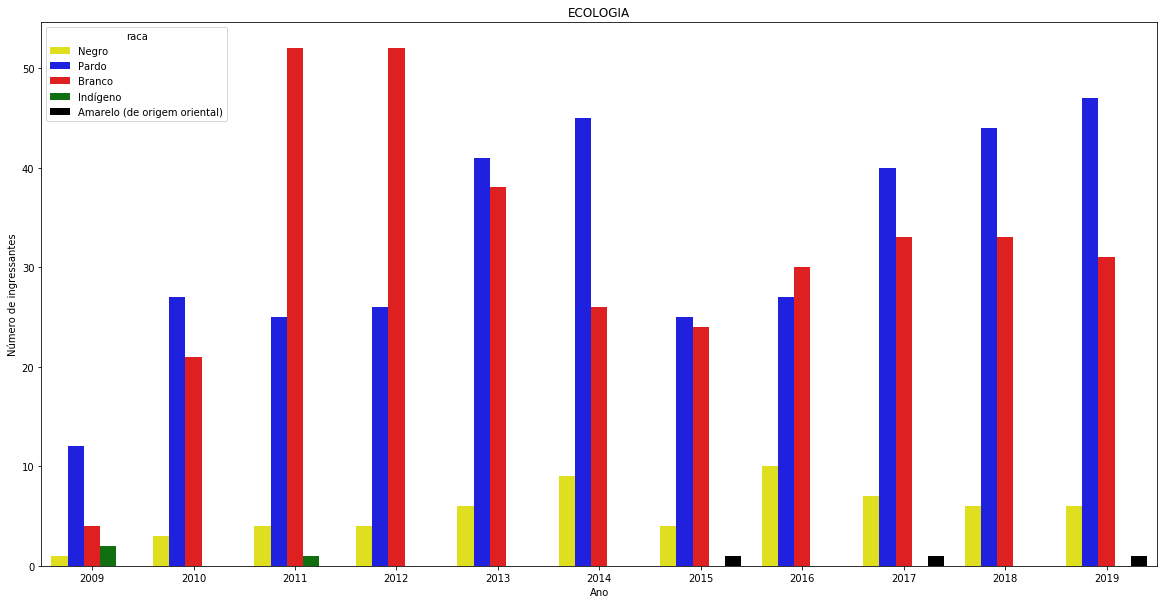

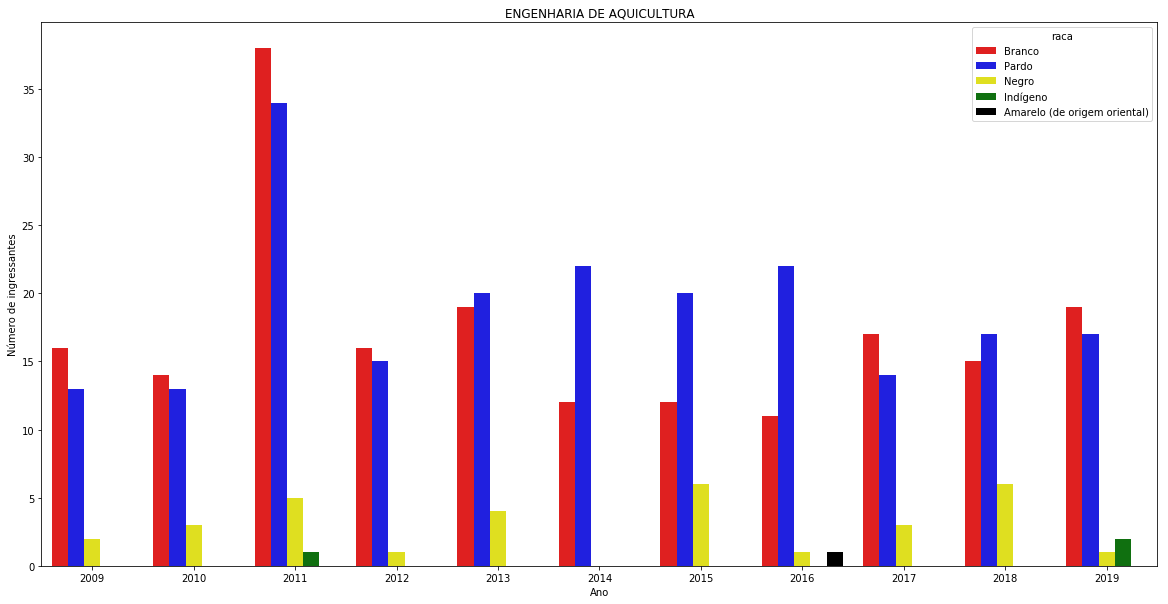

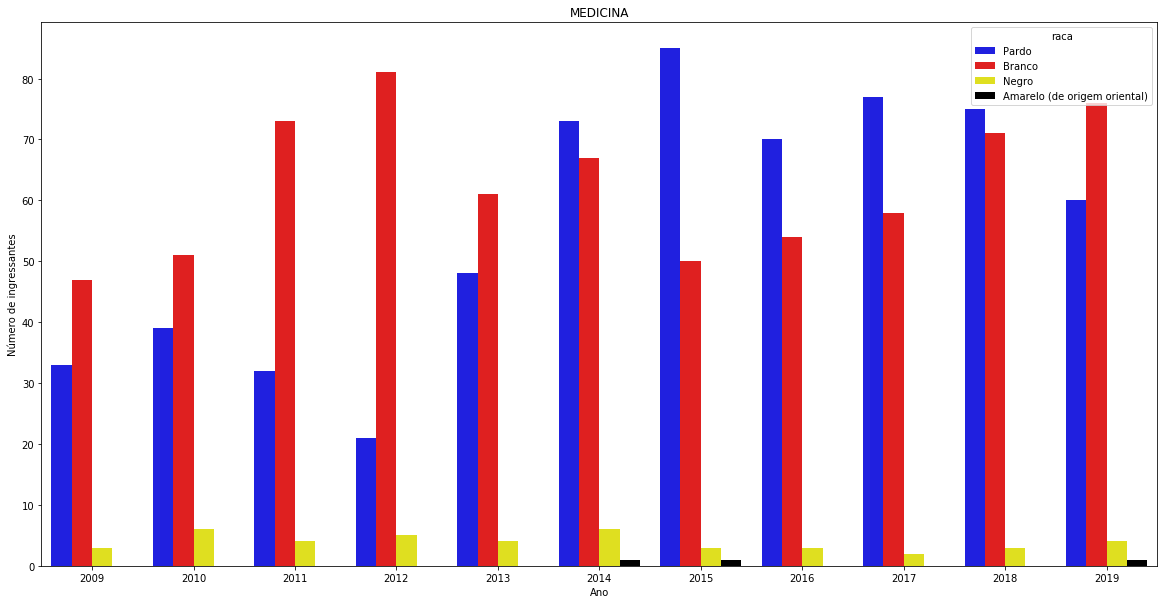

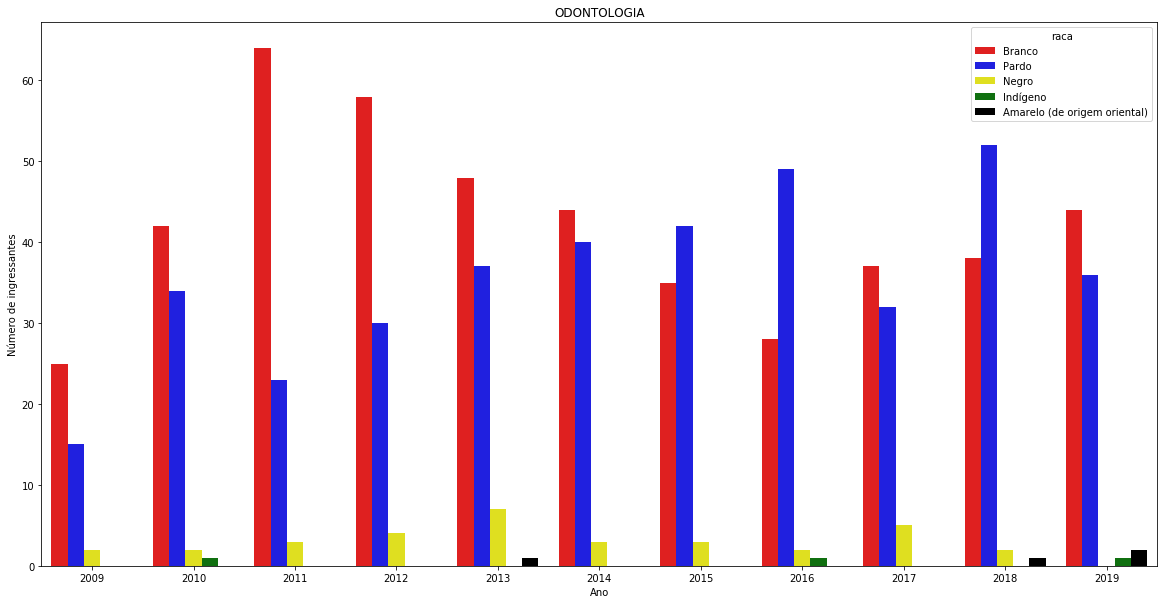

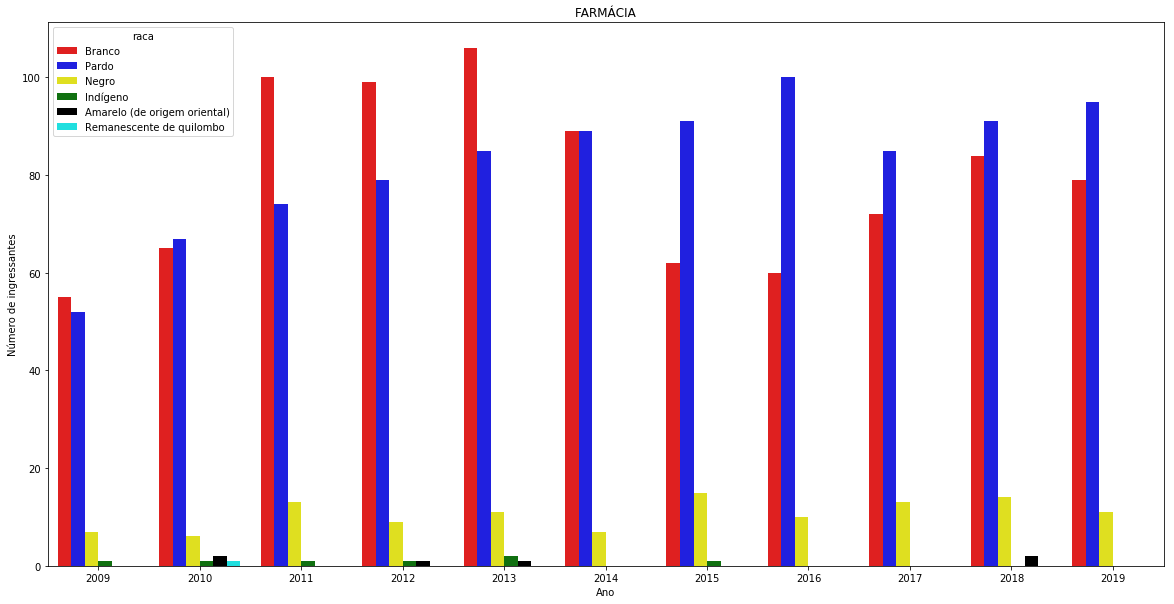

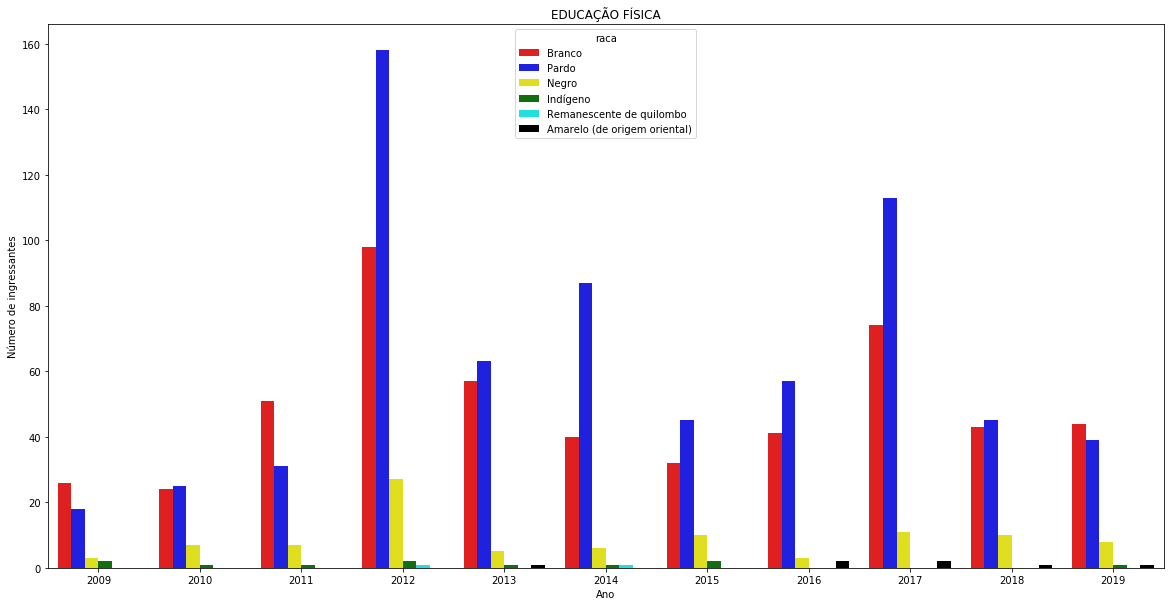

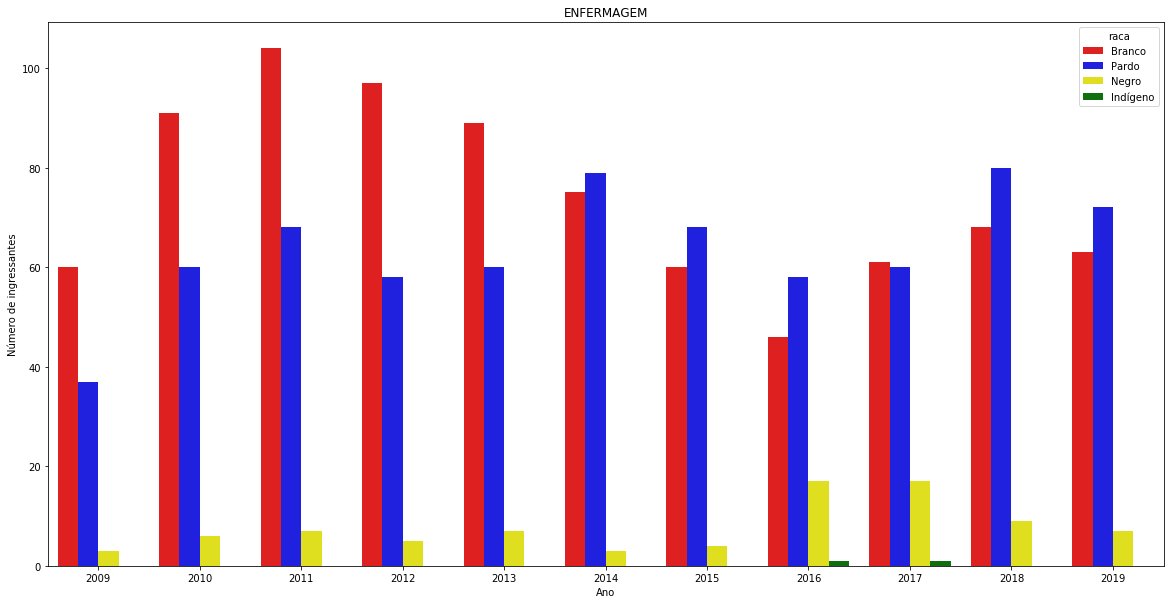

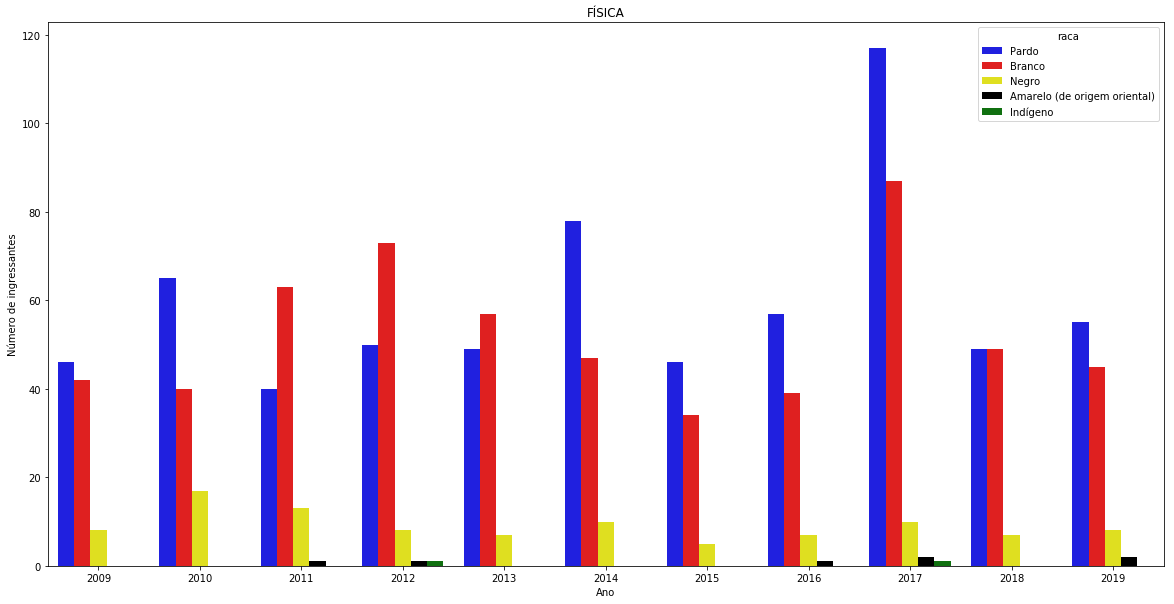

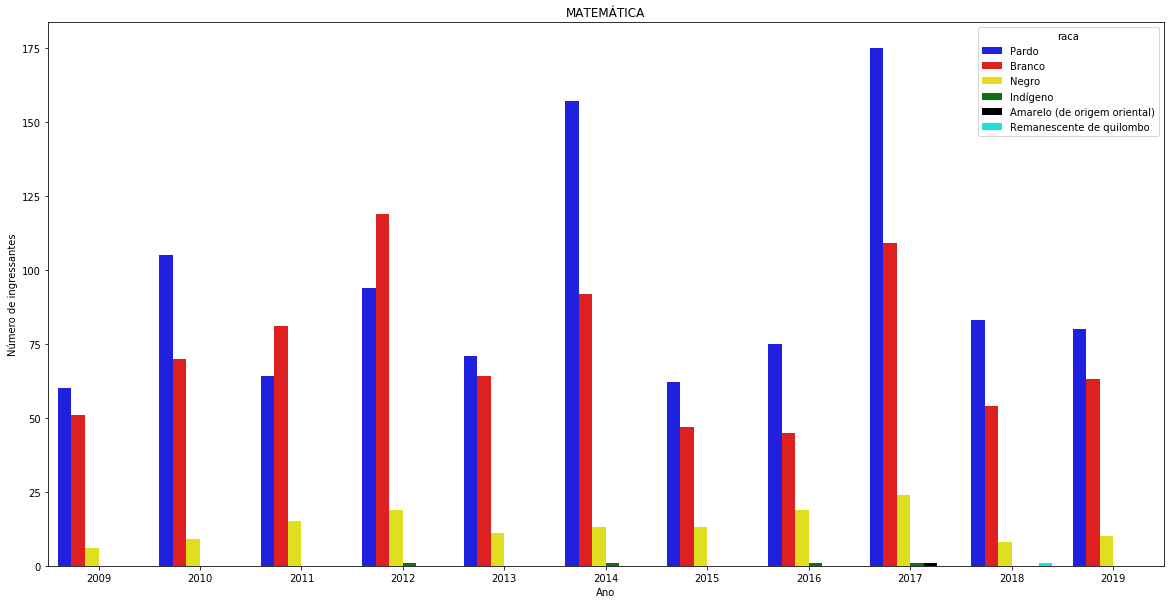

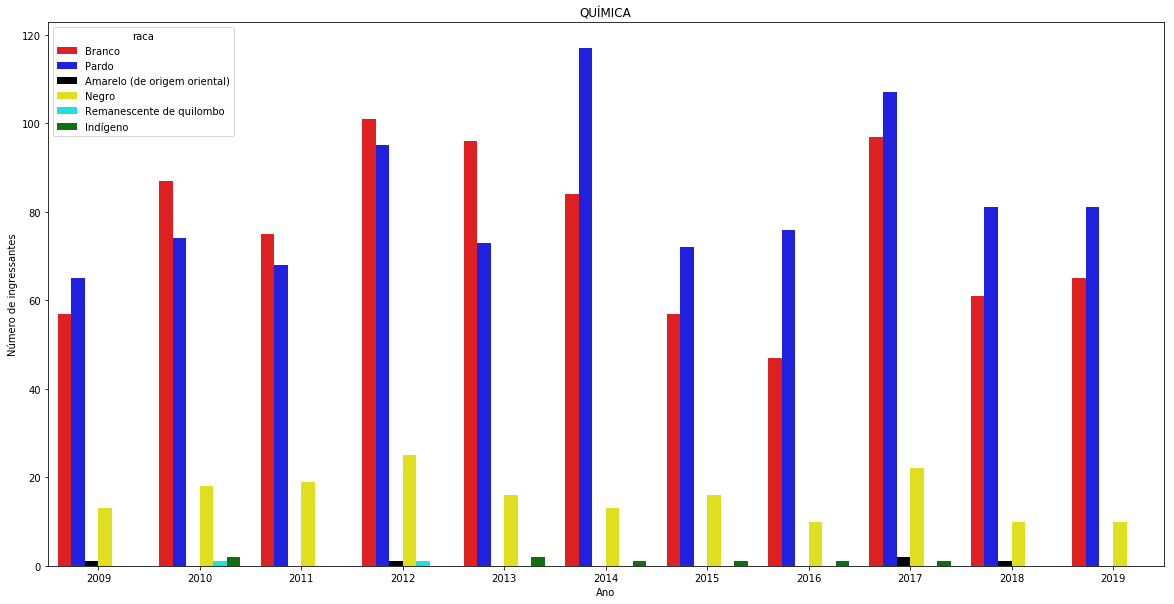

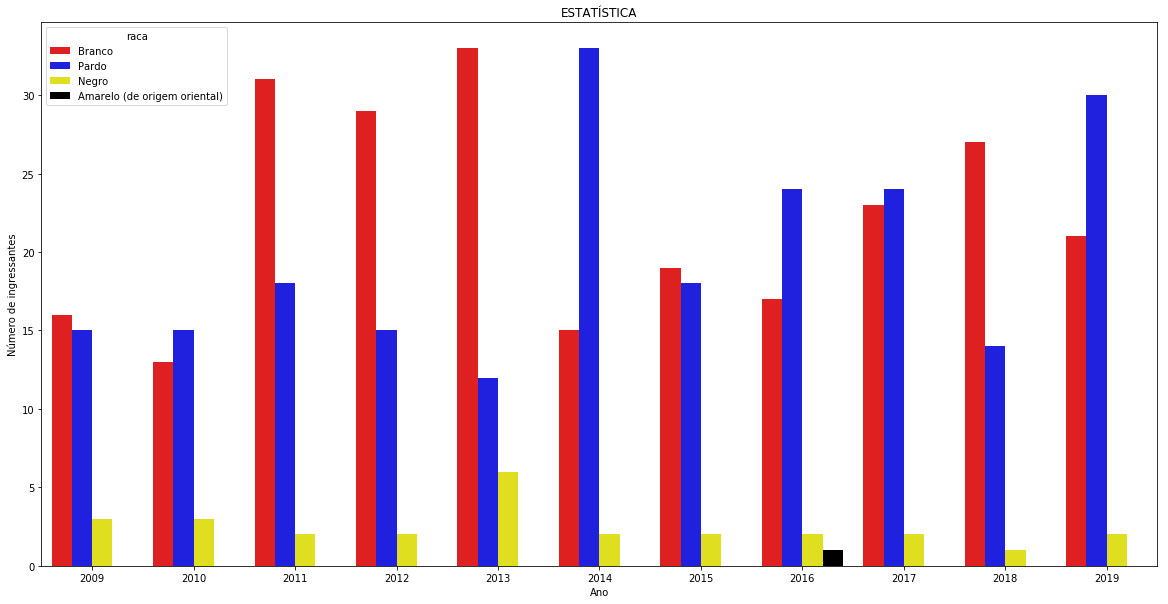

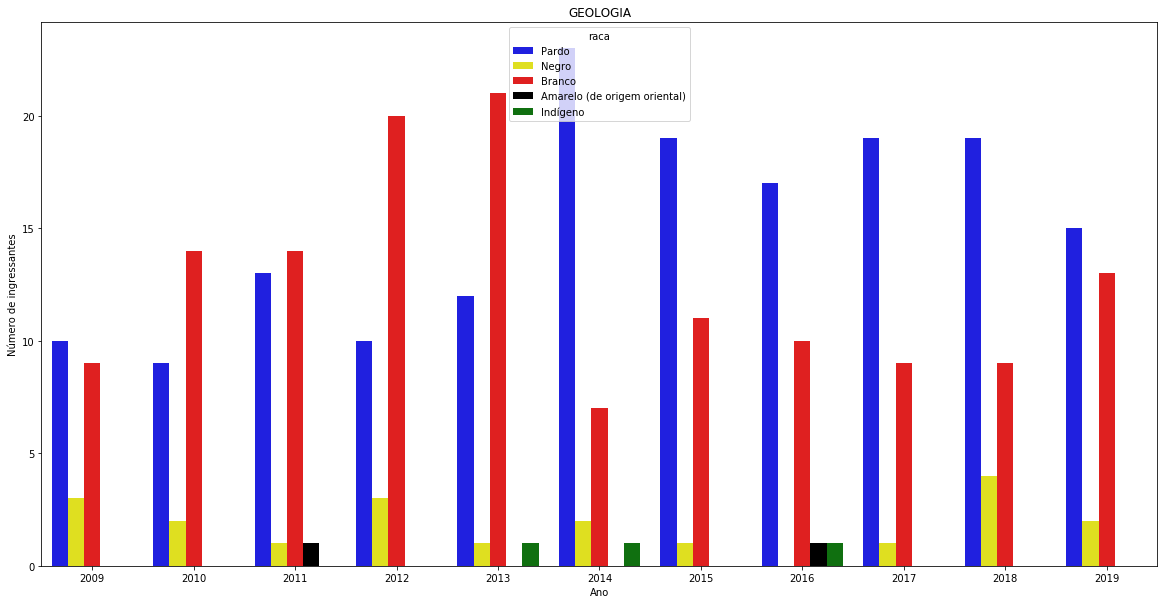

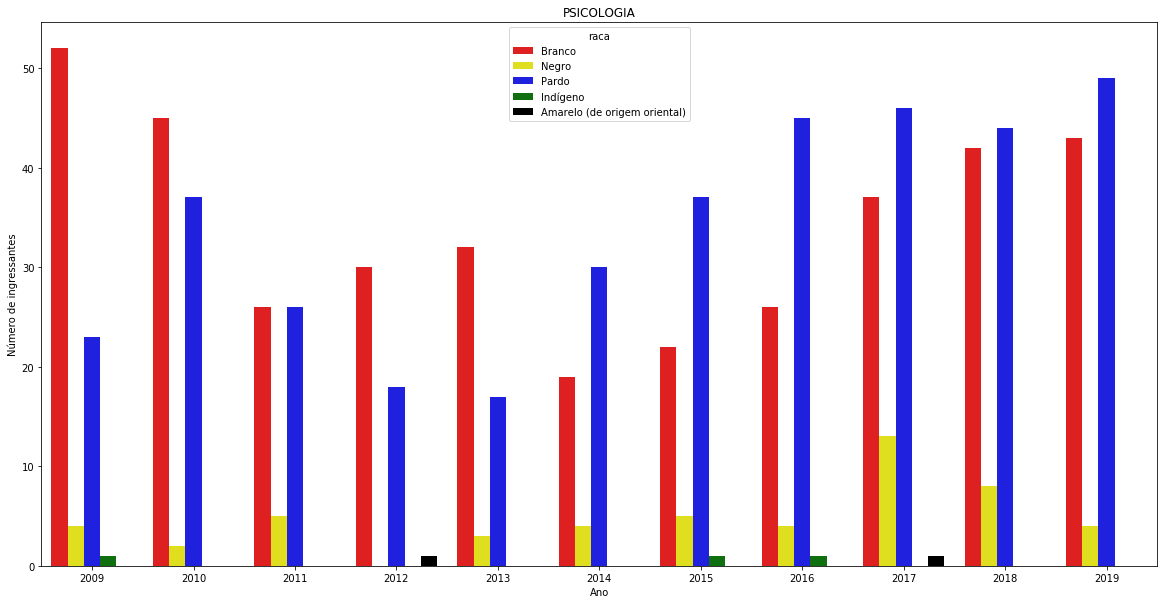

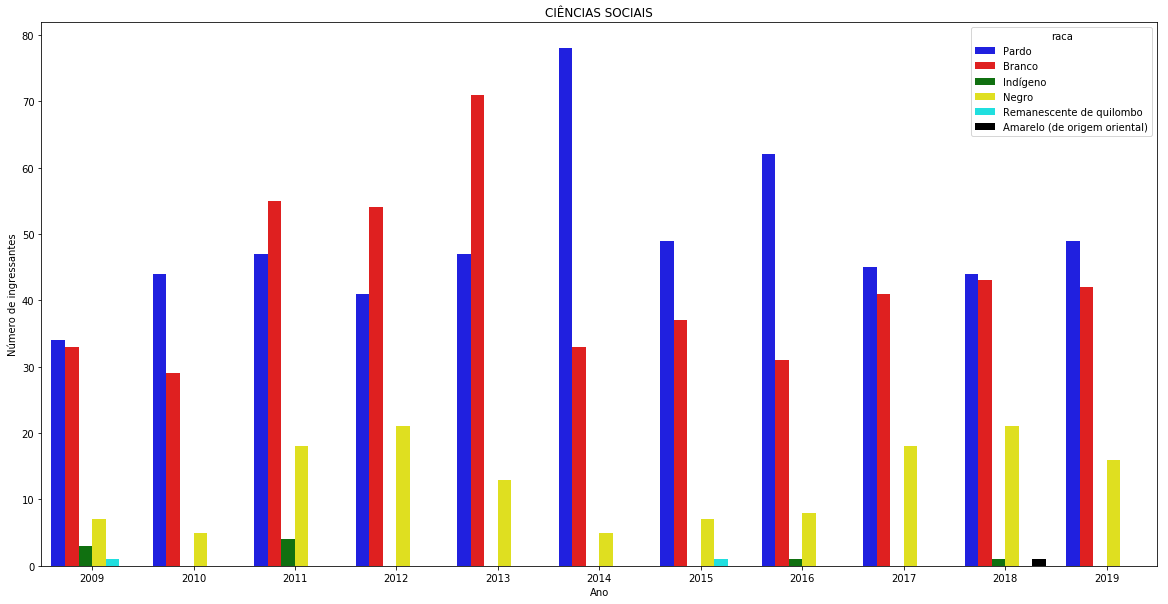

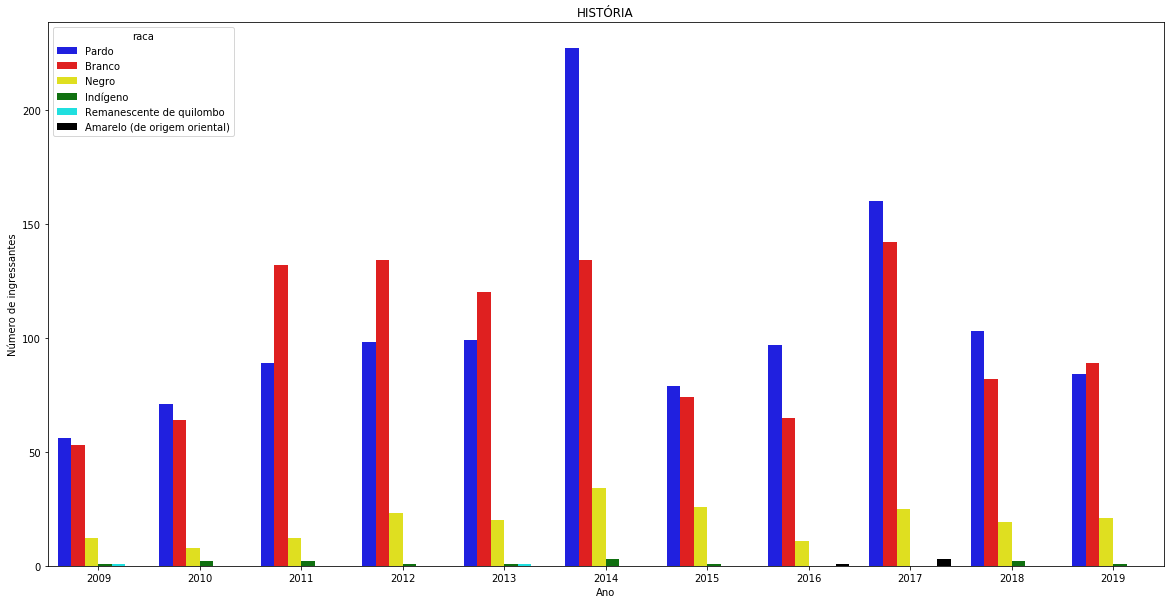

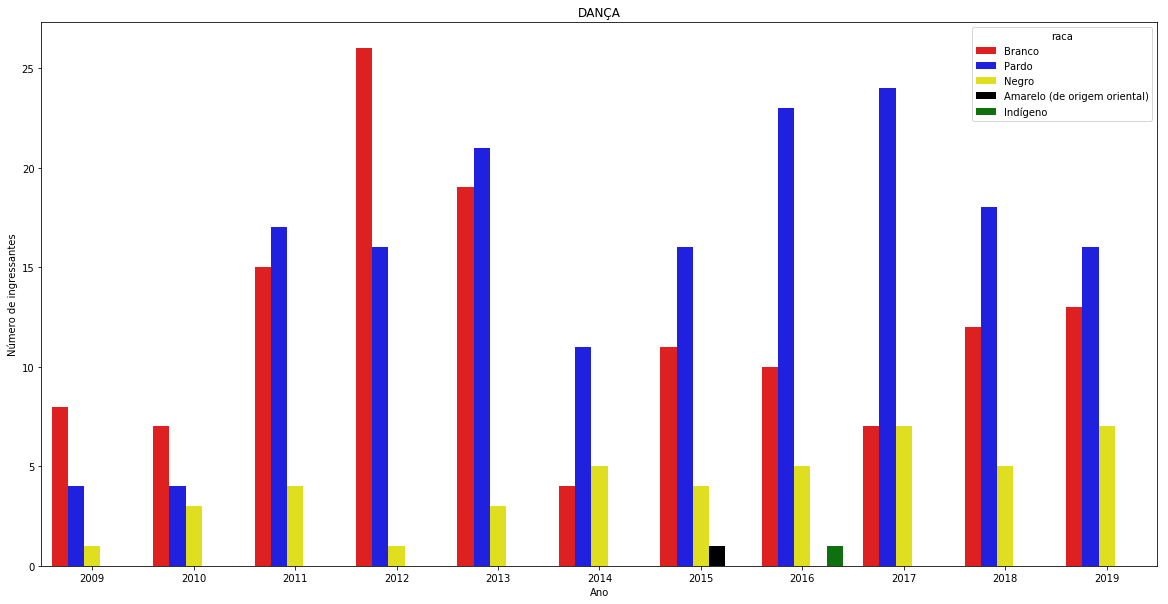

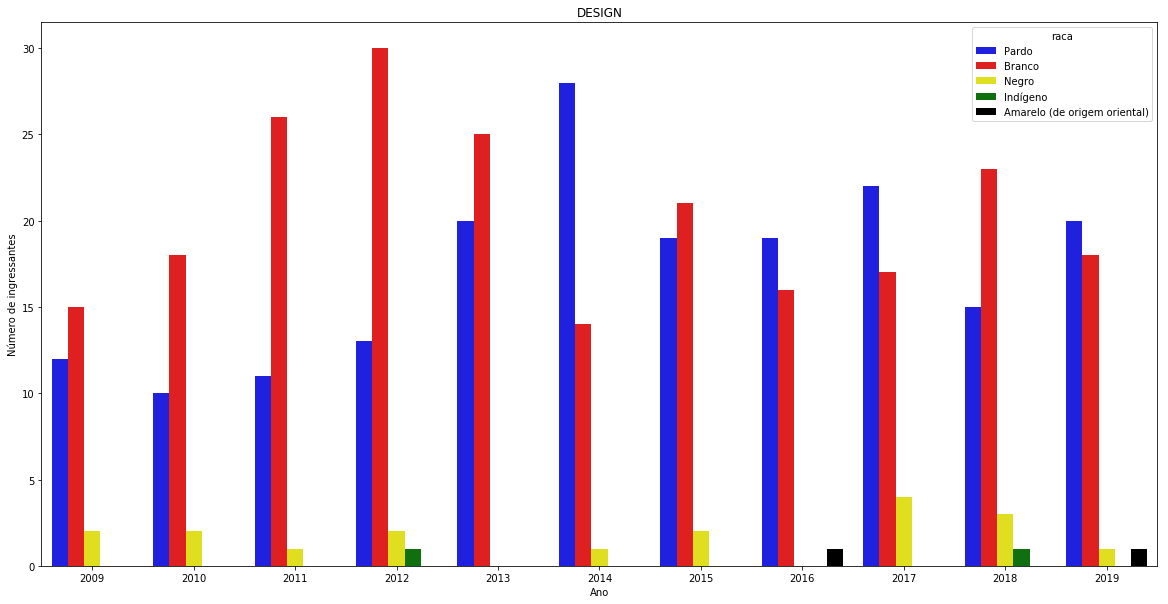

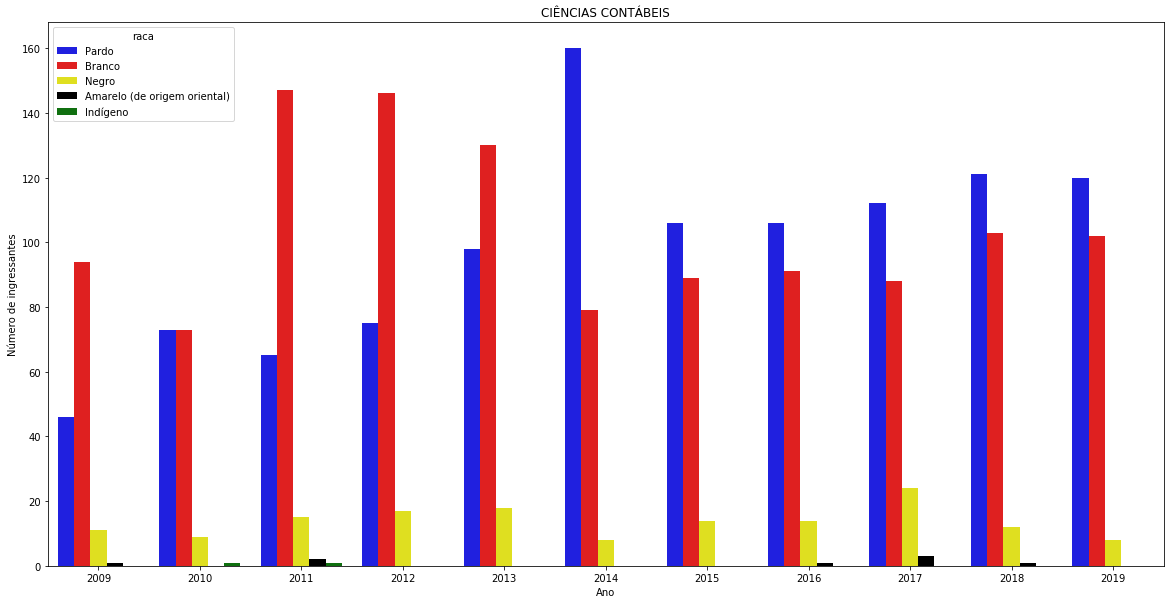

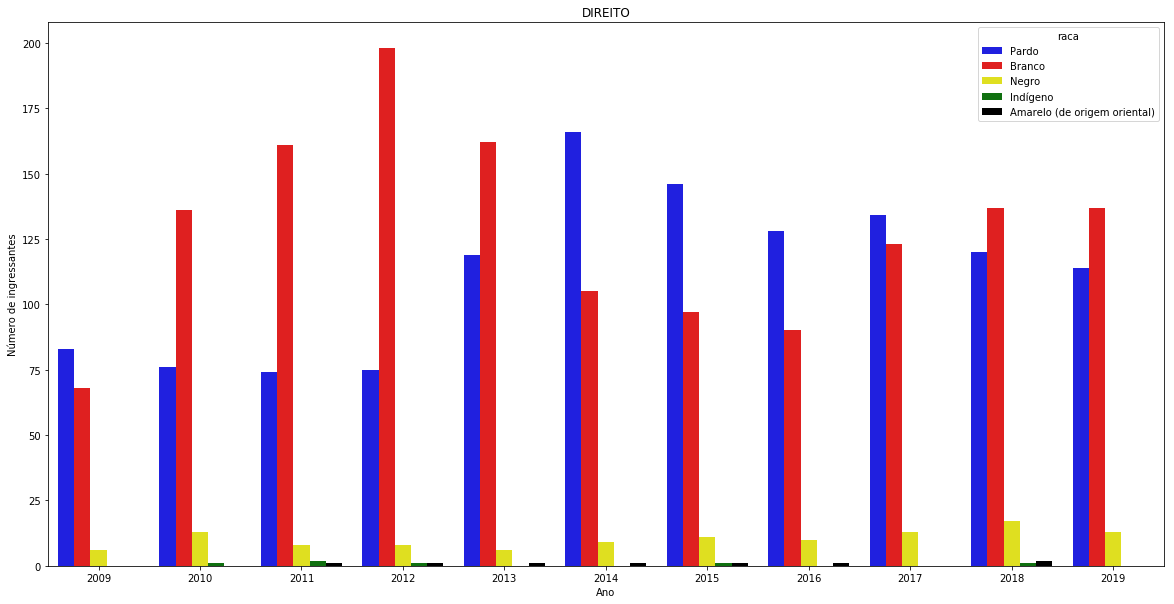

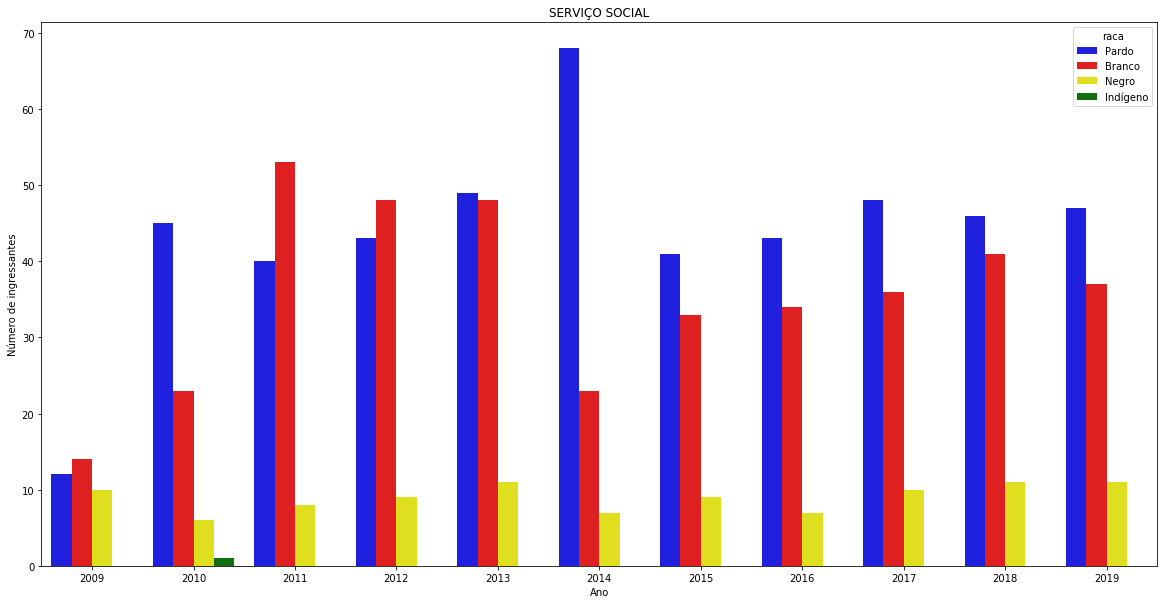

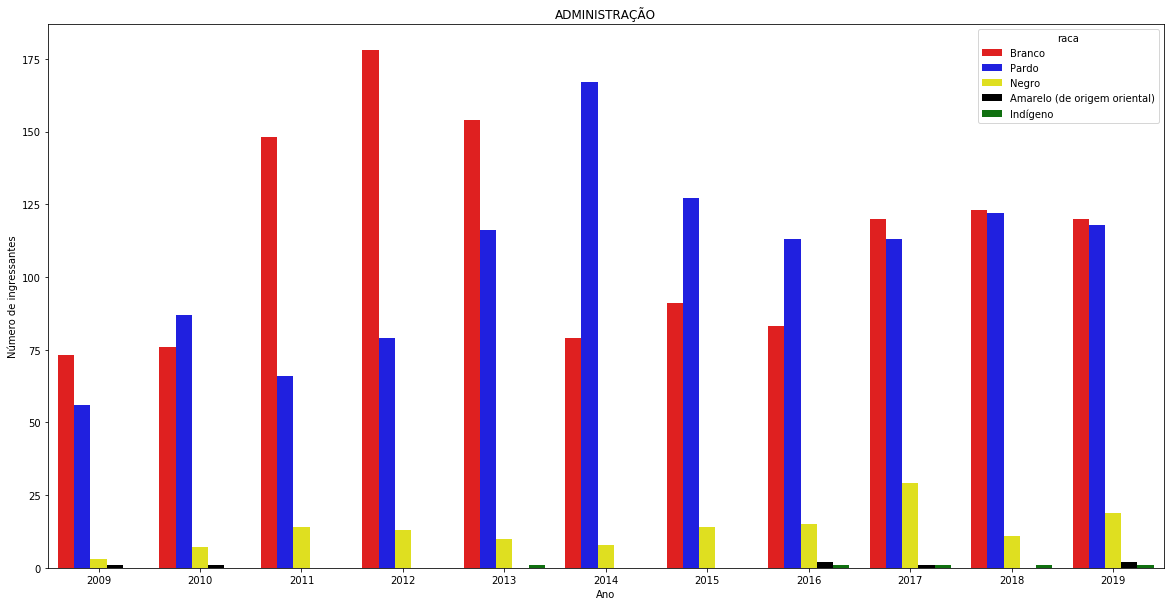

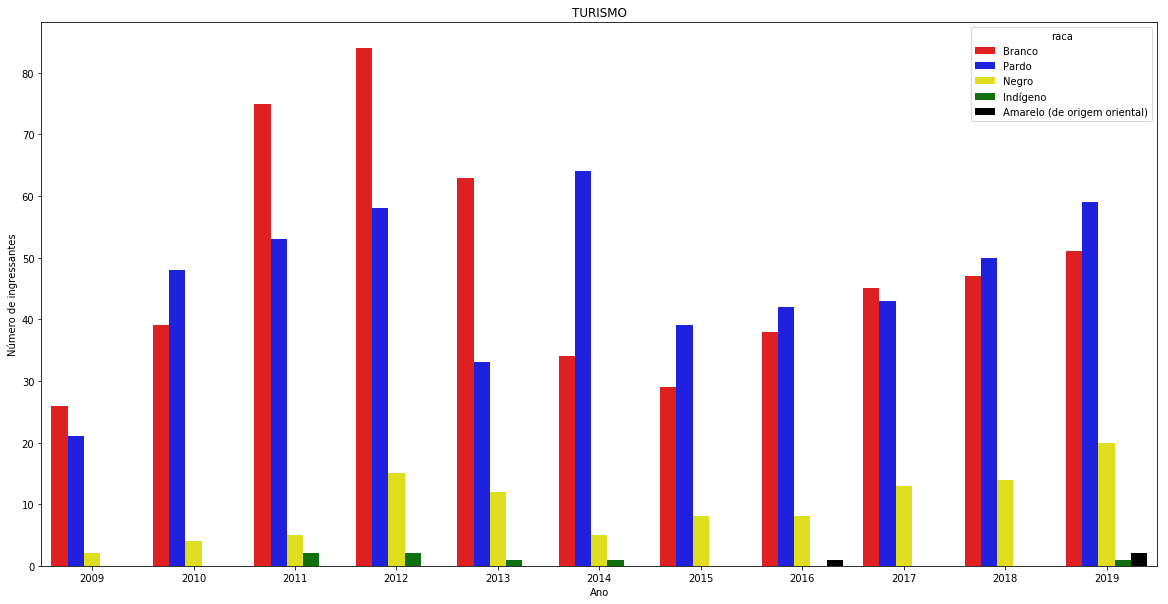

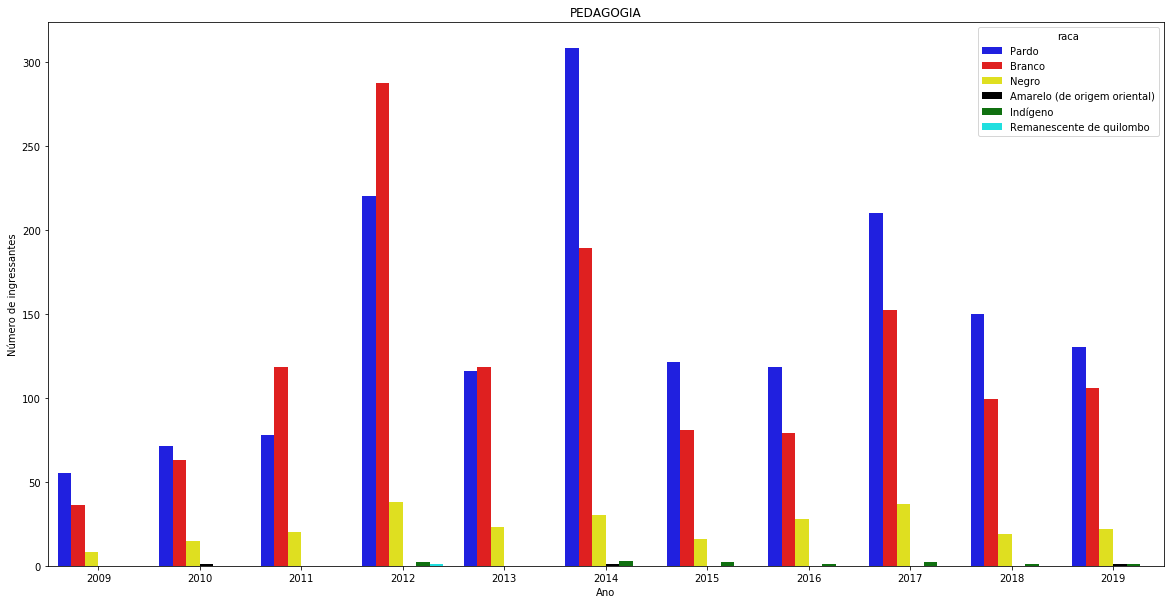

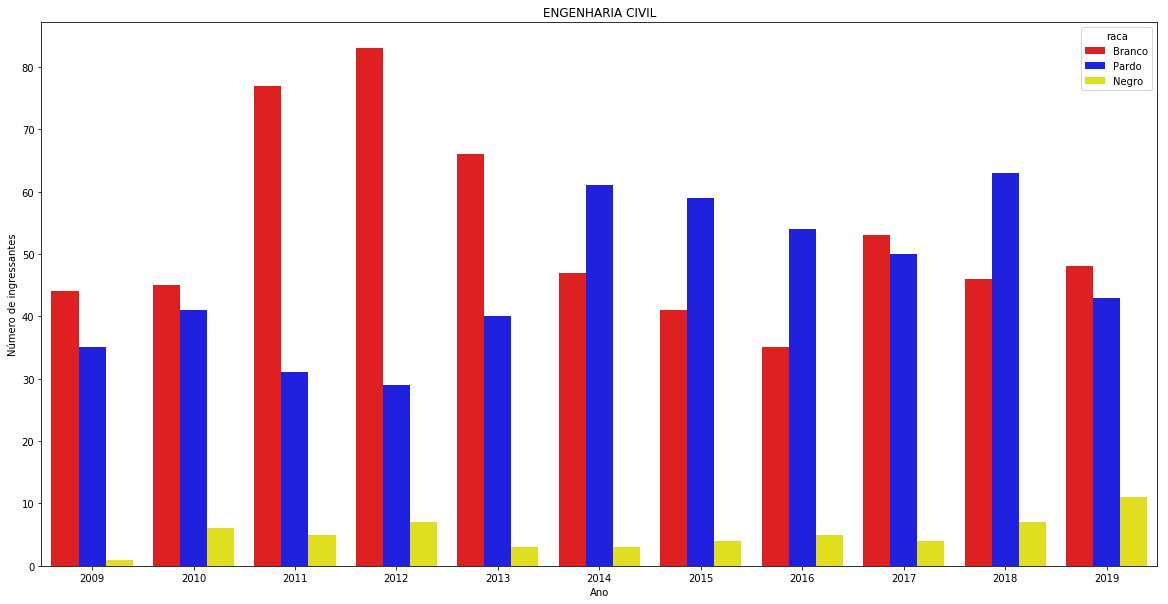

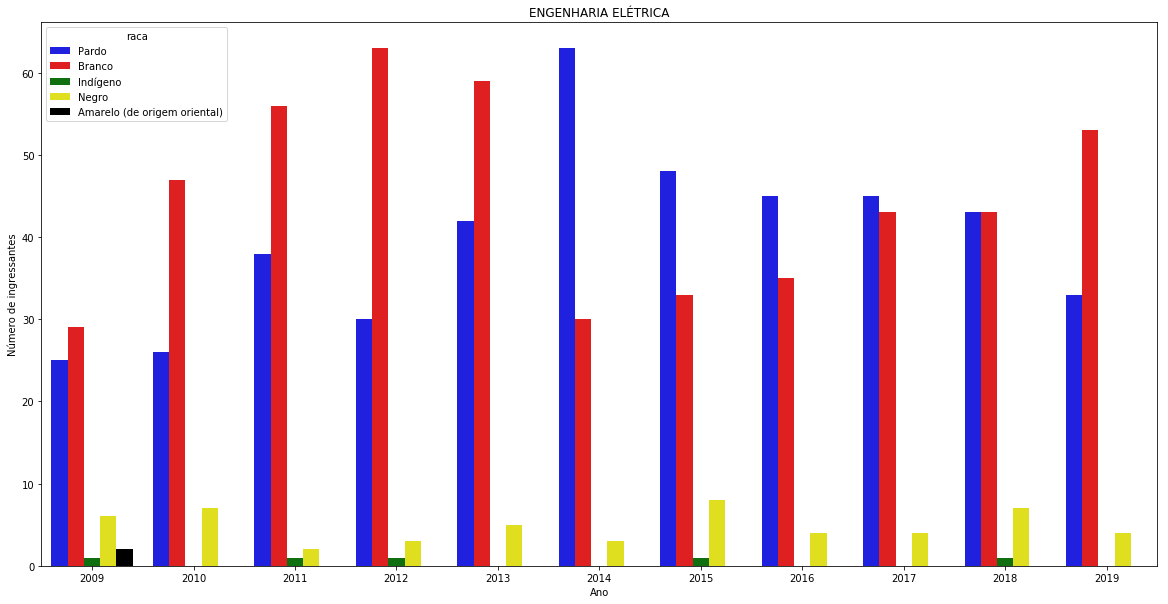

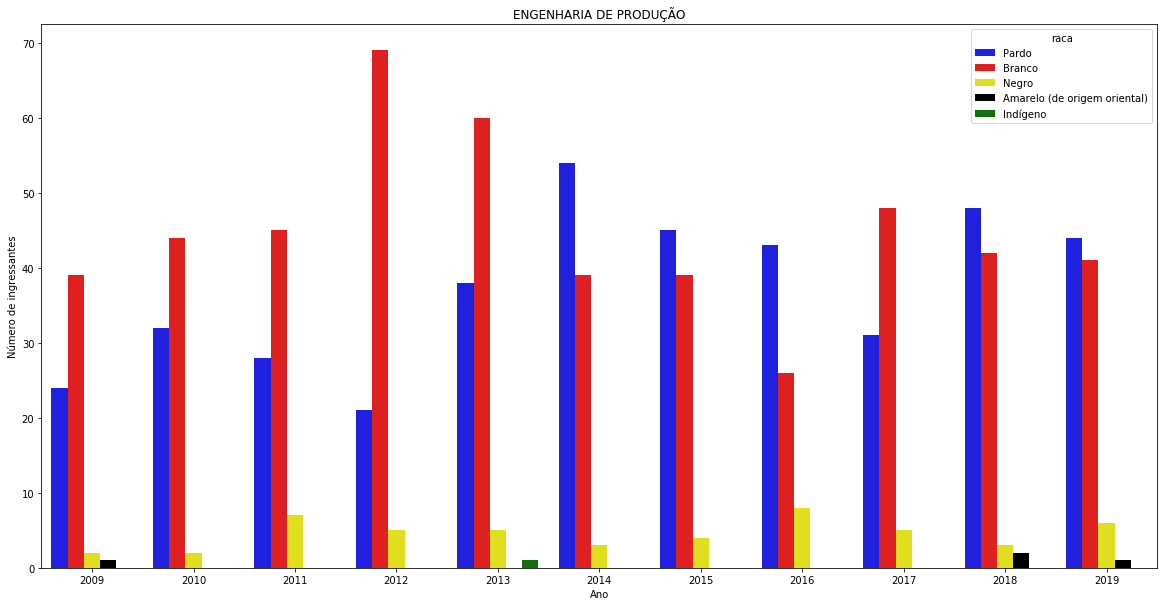

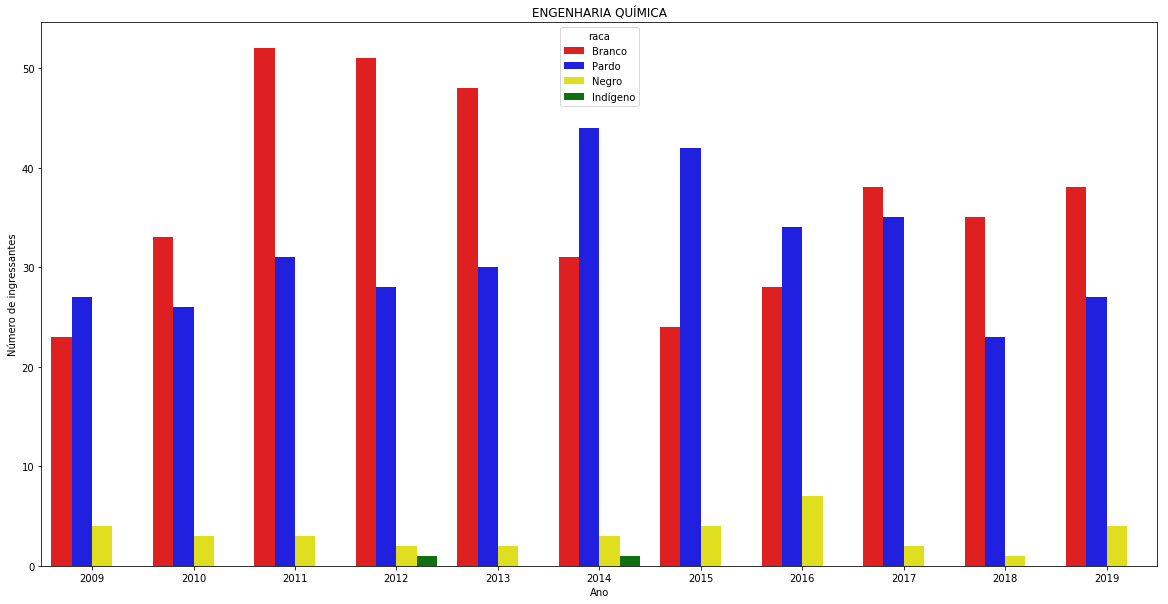

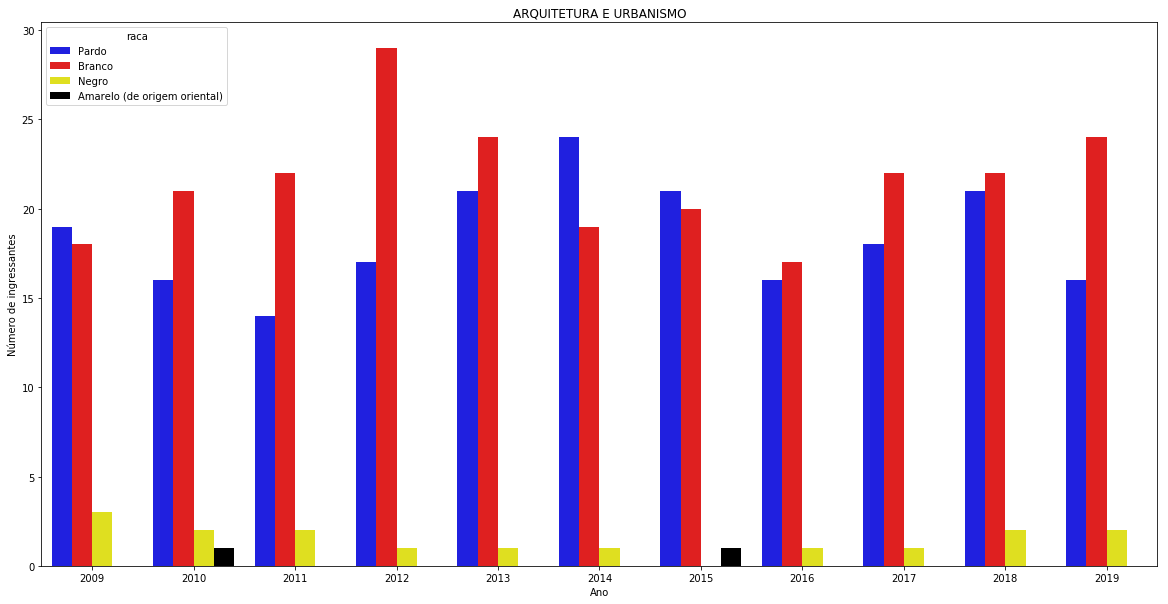

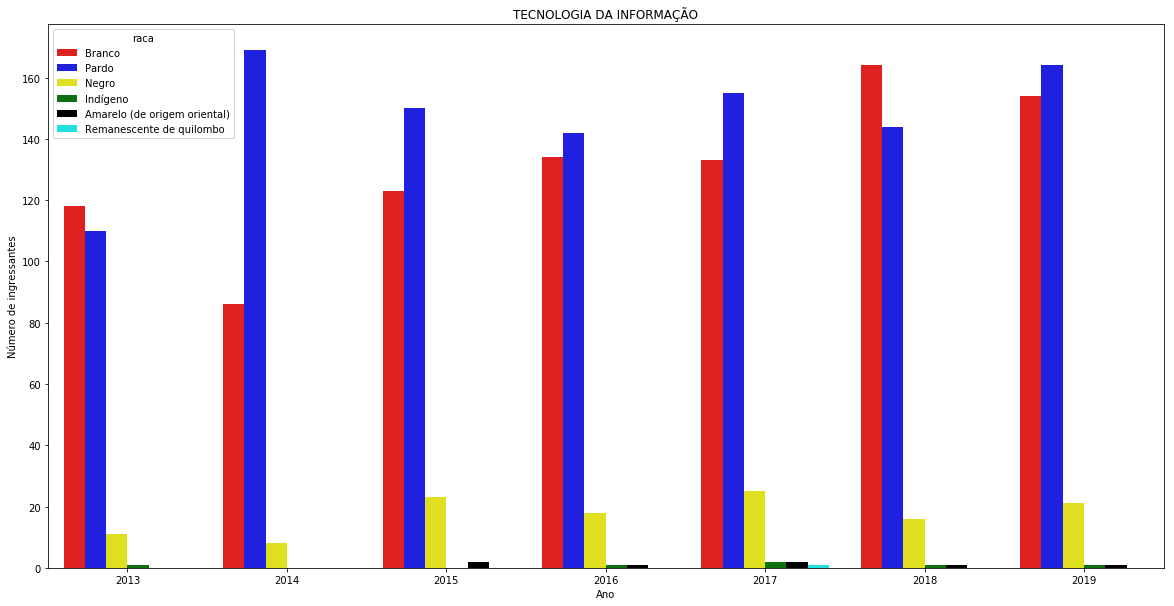

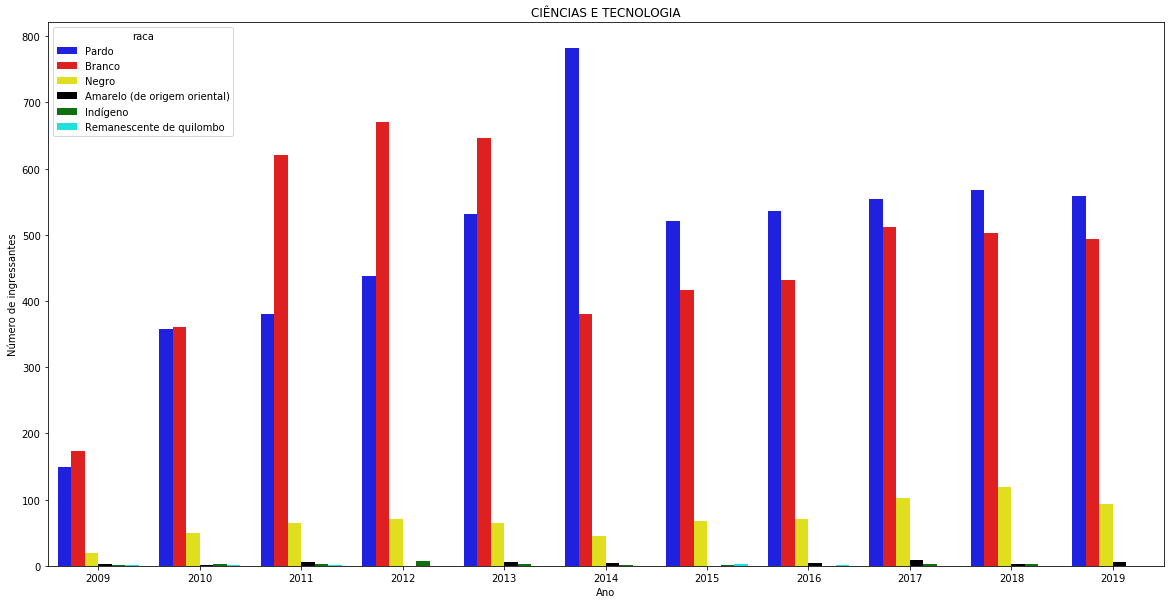

In [27]:

colors = {"Pardo":"blue", "Branco":"red", "Negro":"yellow", "Amarelo (de origem oriental)":"black", "Indígeno":"green", "Remanescente de quilombo":"cyan"}

fig, ax = plt.subplots(figsize=(20,10))
plt.title('GRÁFICO GERAL')
ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = graduation_raca, palette = colors)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de ingressantes')
plt.show()

for i in range(32):
  course = graduation_raca.loc[graduation_raca['nome_curso'] == courses[i]]
  fig, ax = plt.subplots(figsize=(20,10))
  plt.title(courses[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = course, palette = colors)
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de ingressantes')
  plt.show()

- **Com a análise das etnias feitas, agora vamos fazer a análise dos sexos nos cursos selecionados, e também um gráfico geral.**


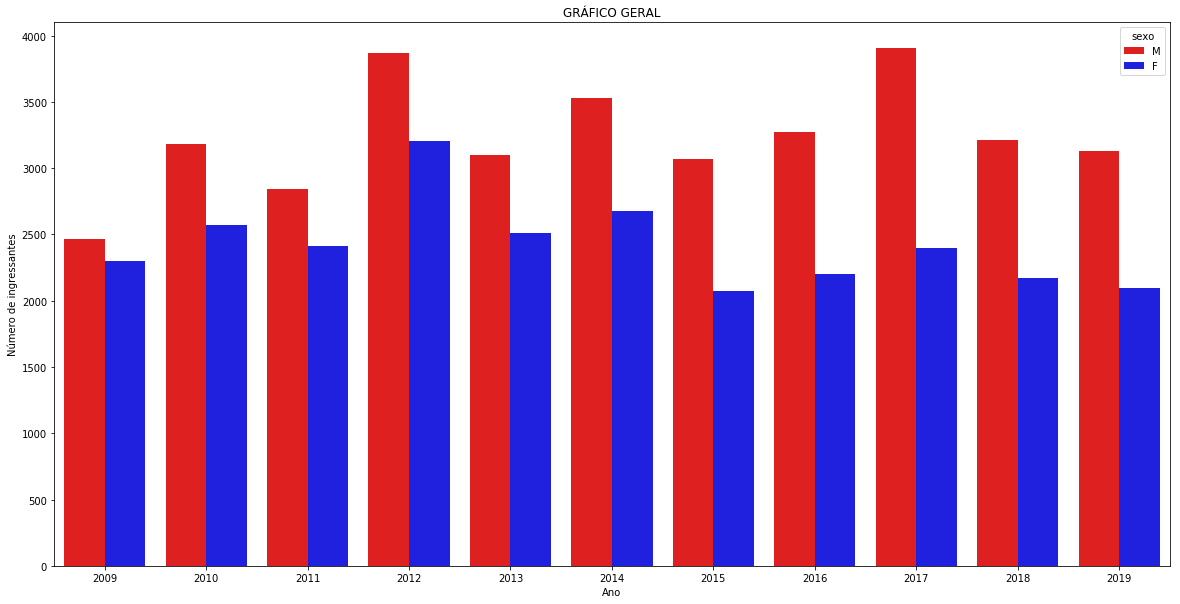

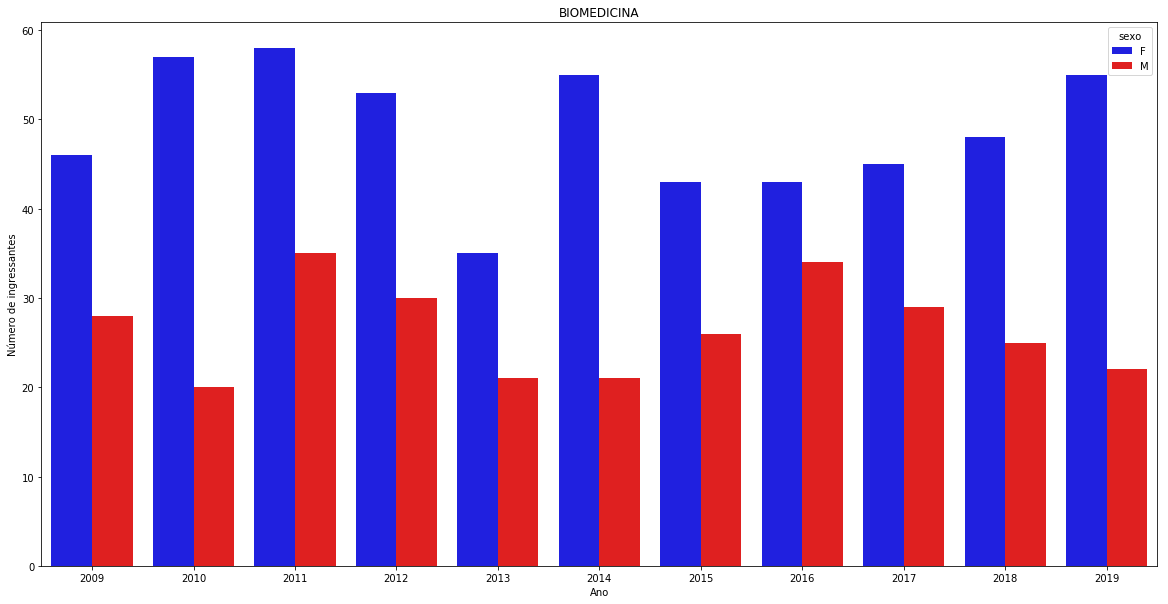

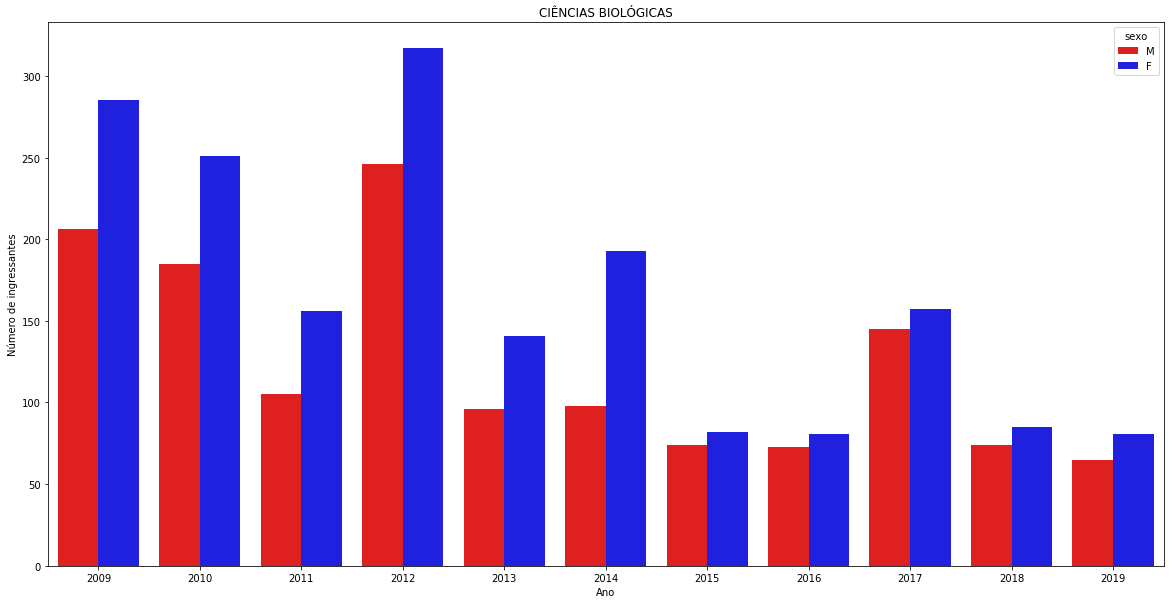

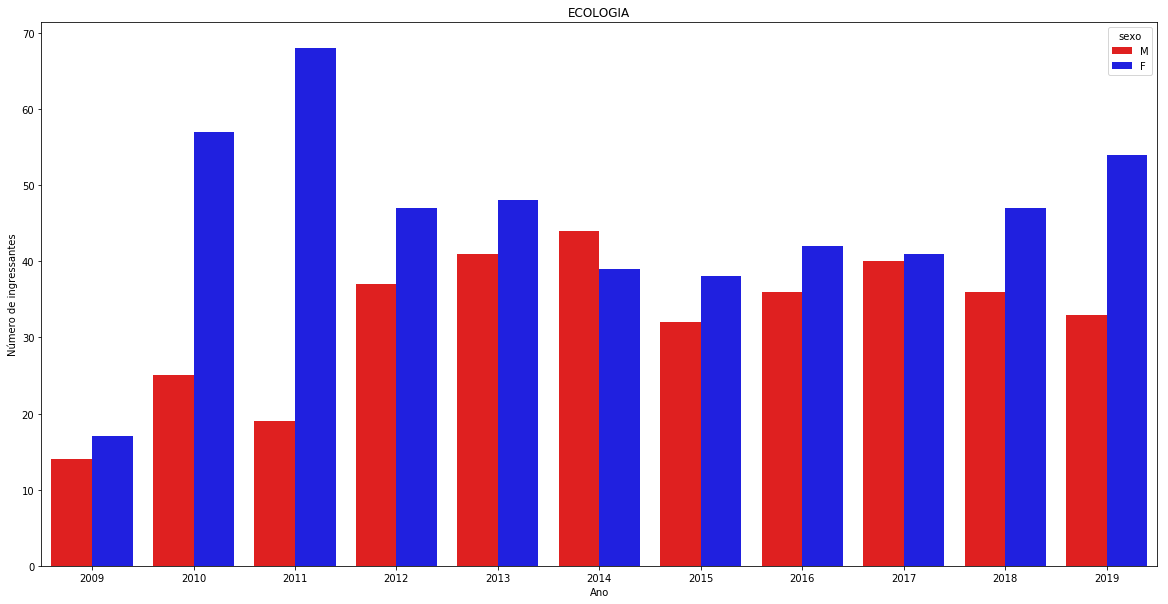

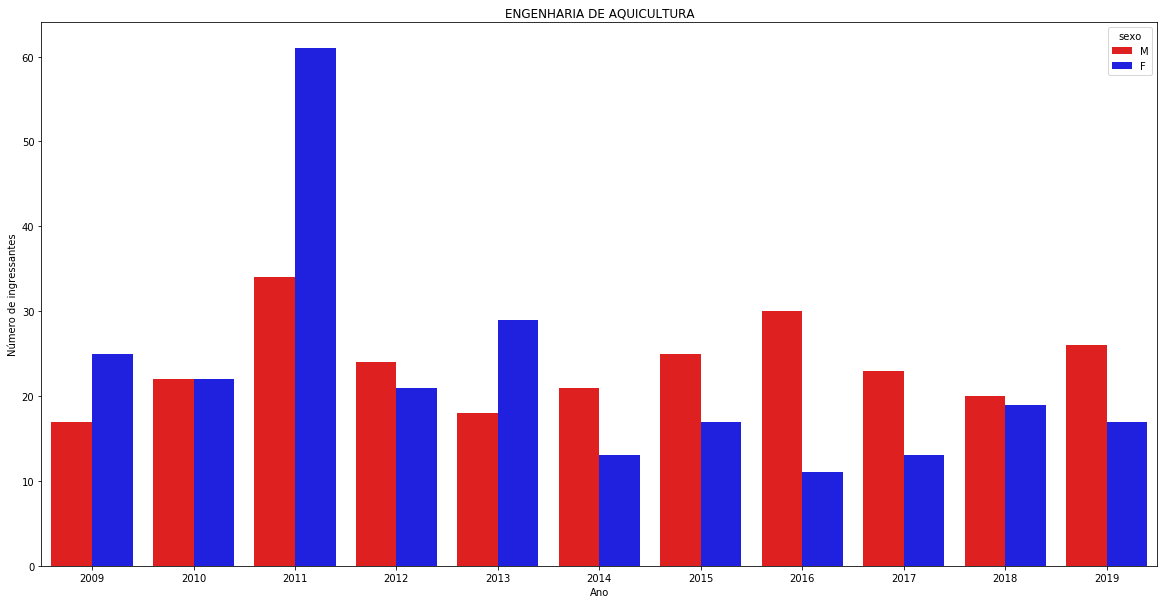

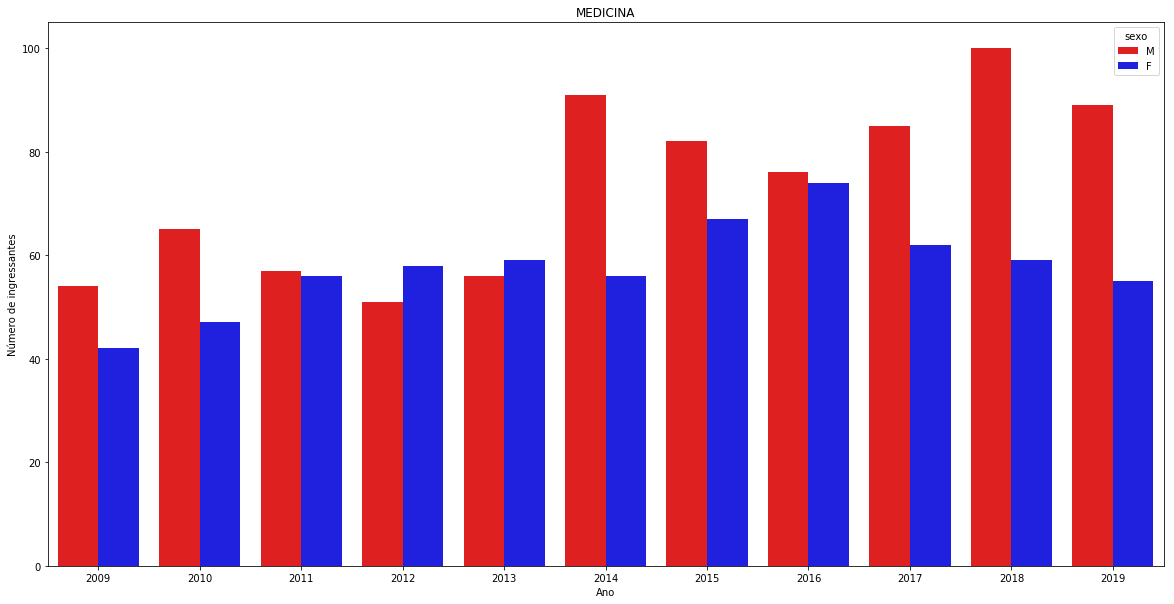

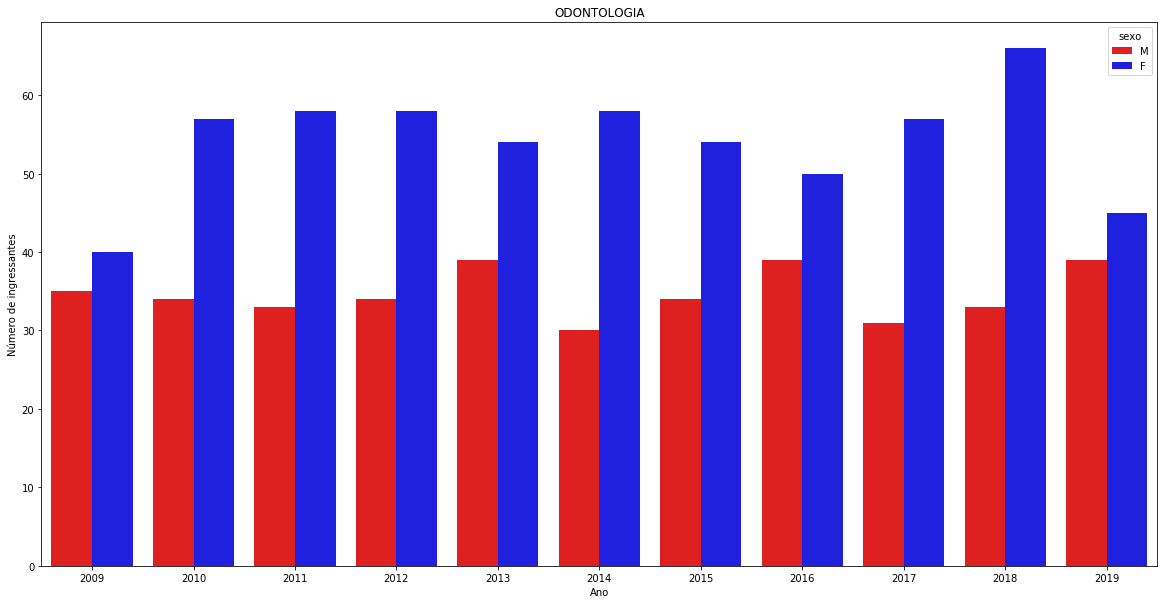

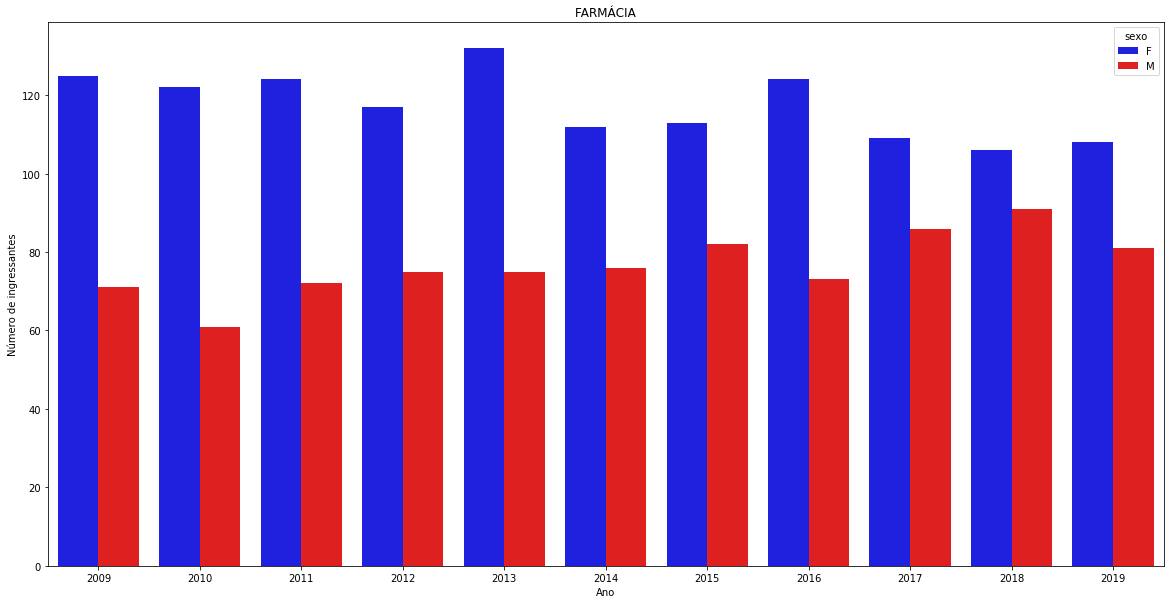

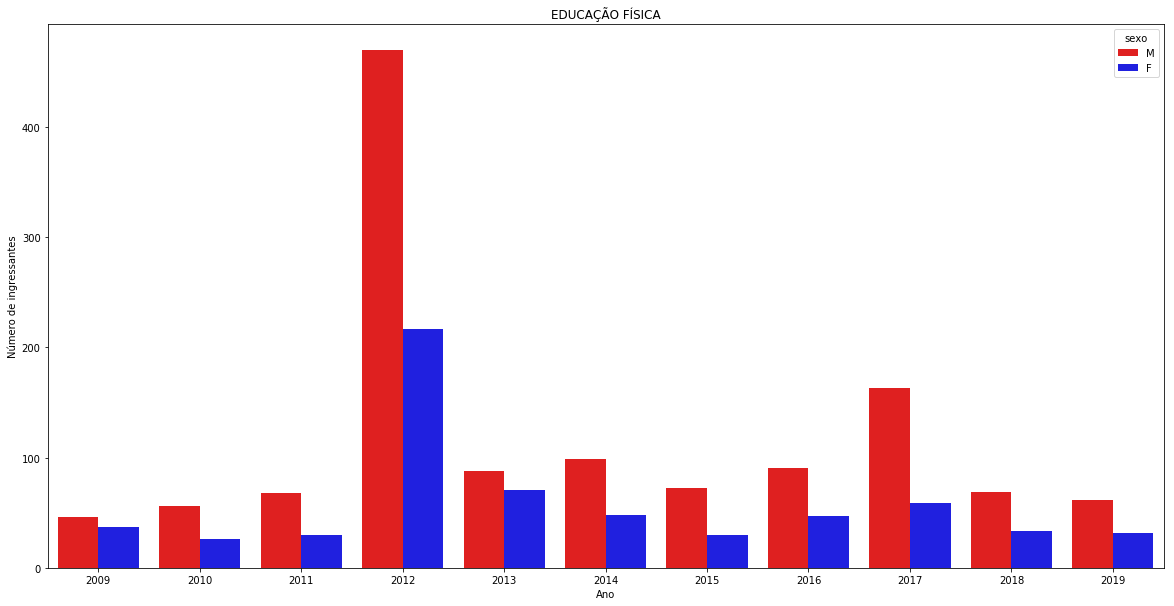

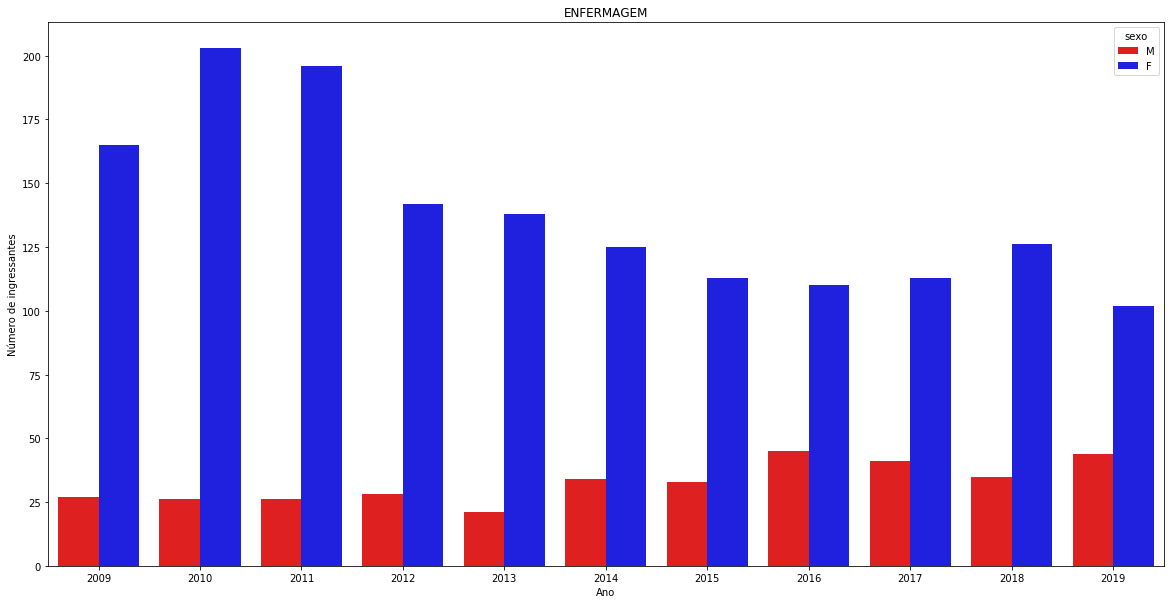

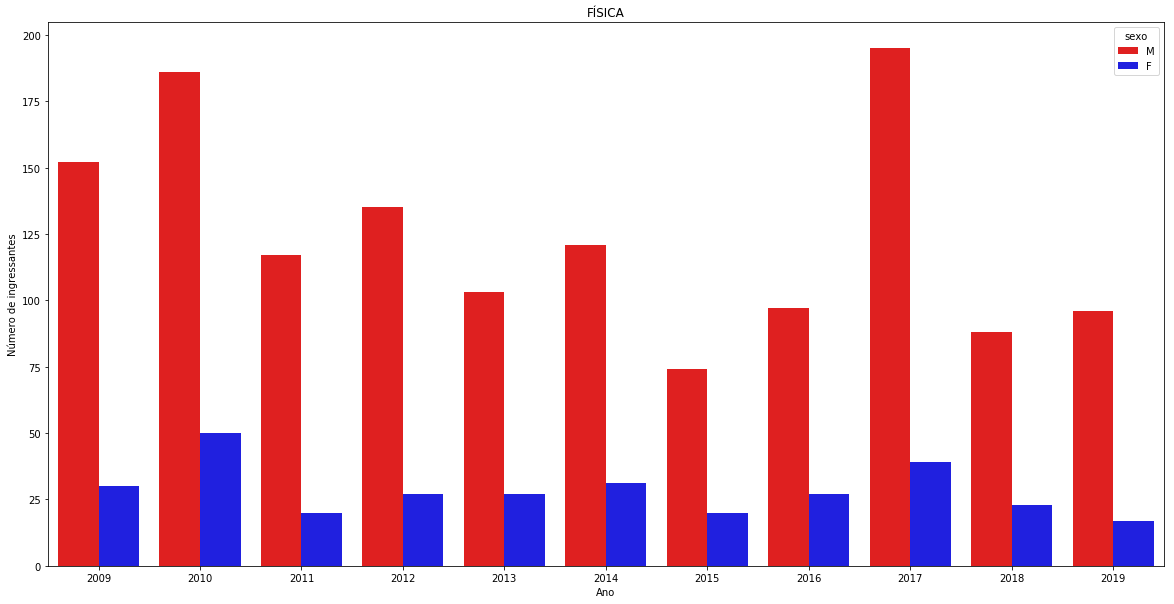

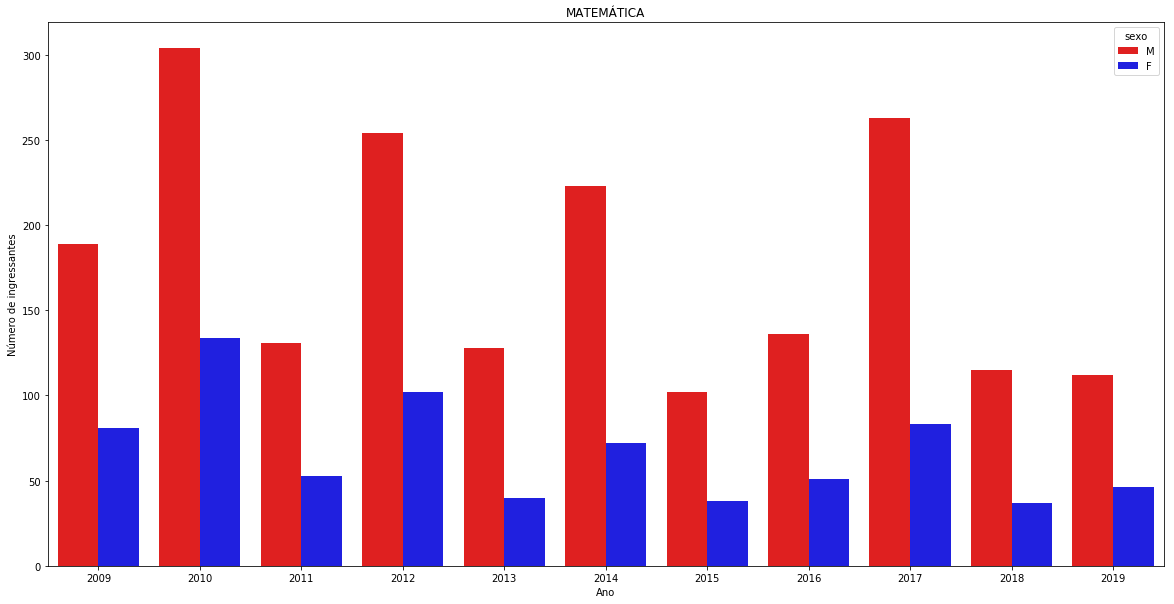

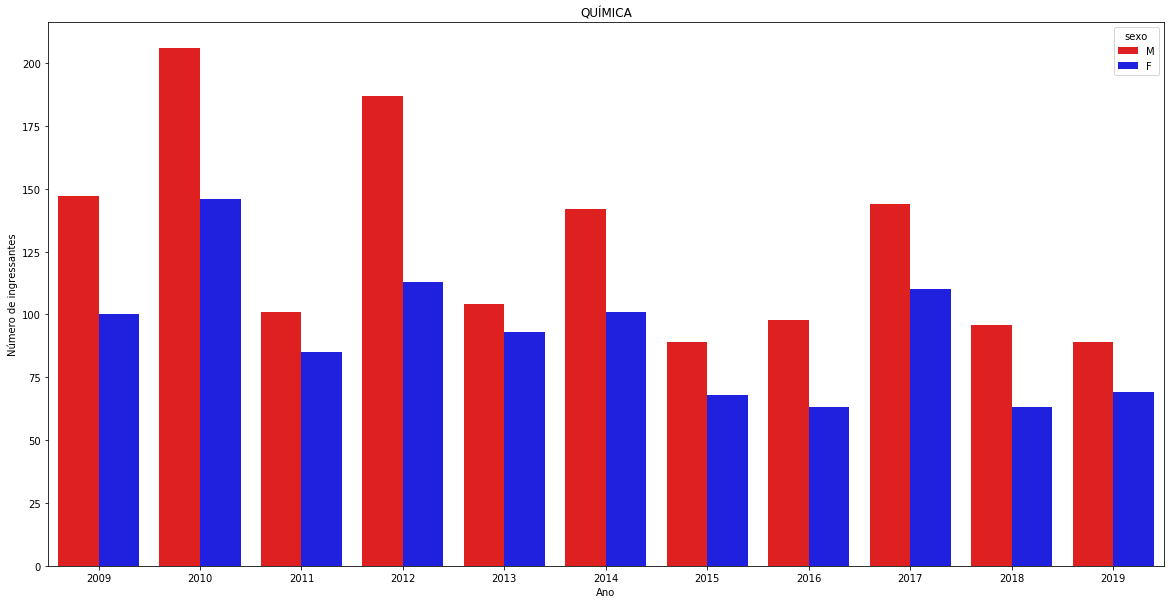

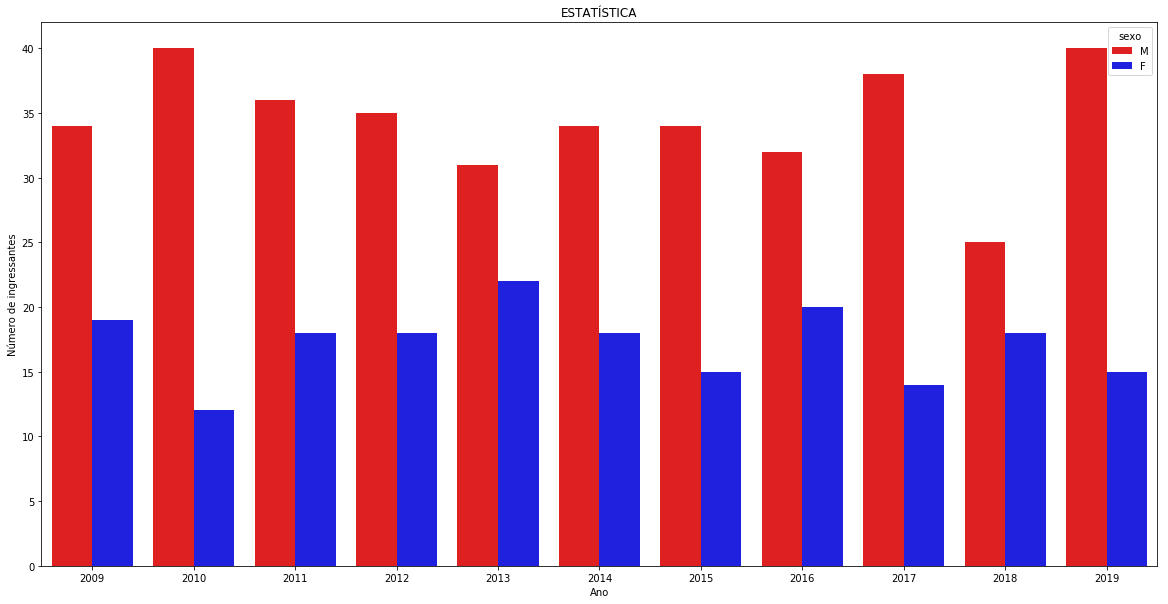

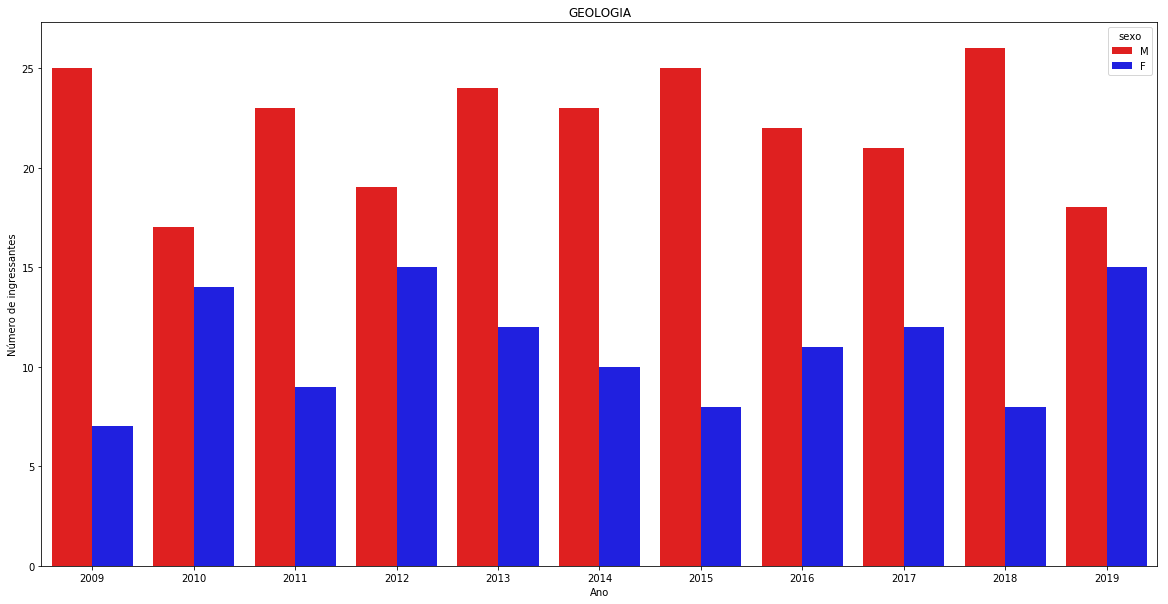

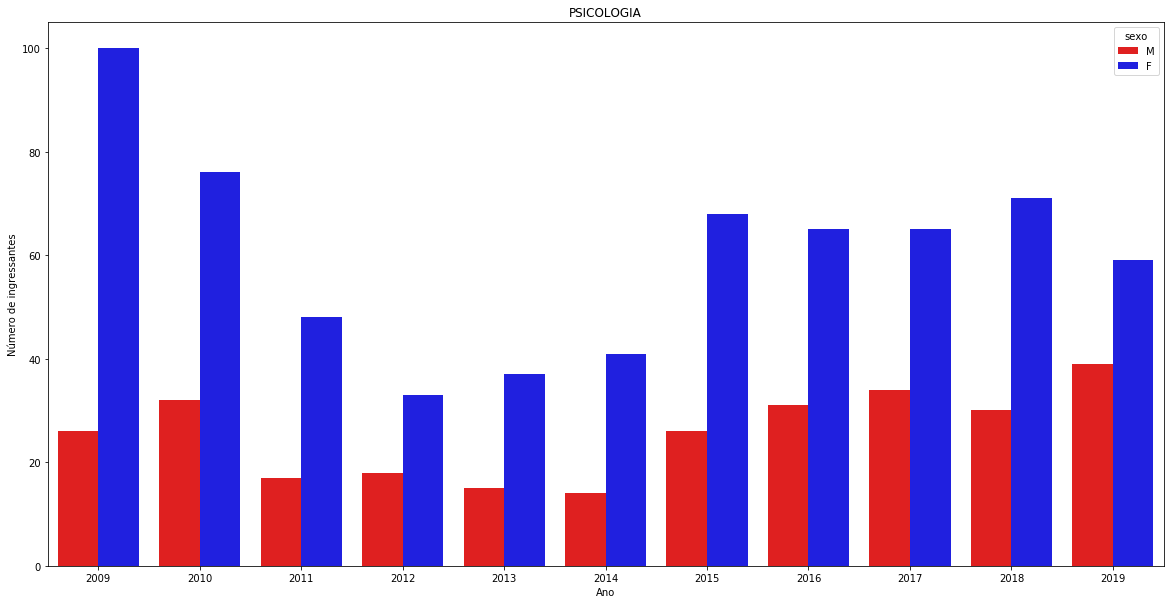

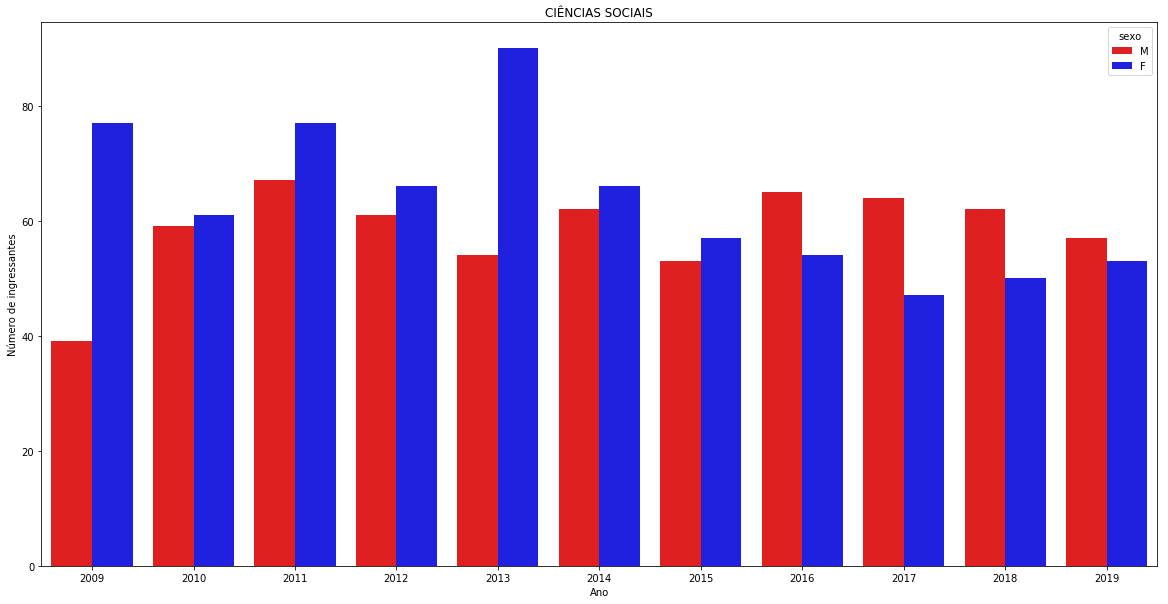

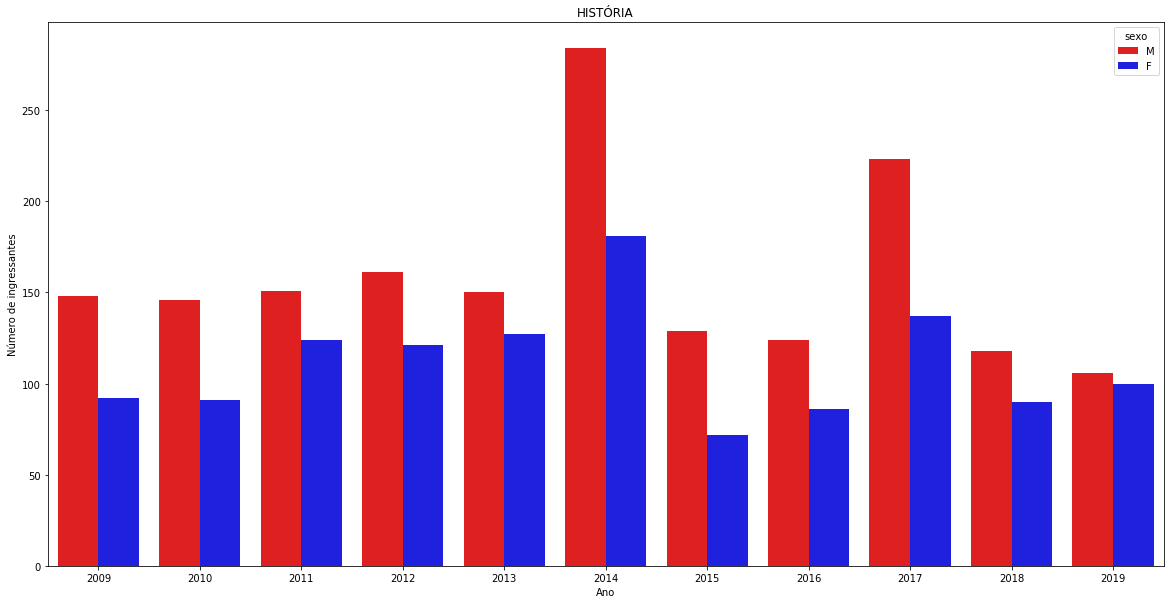

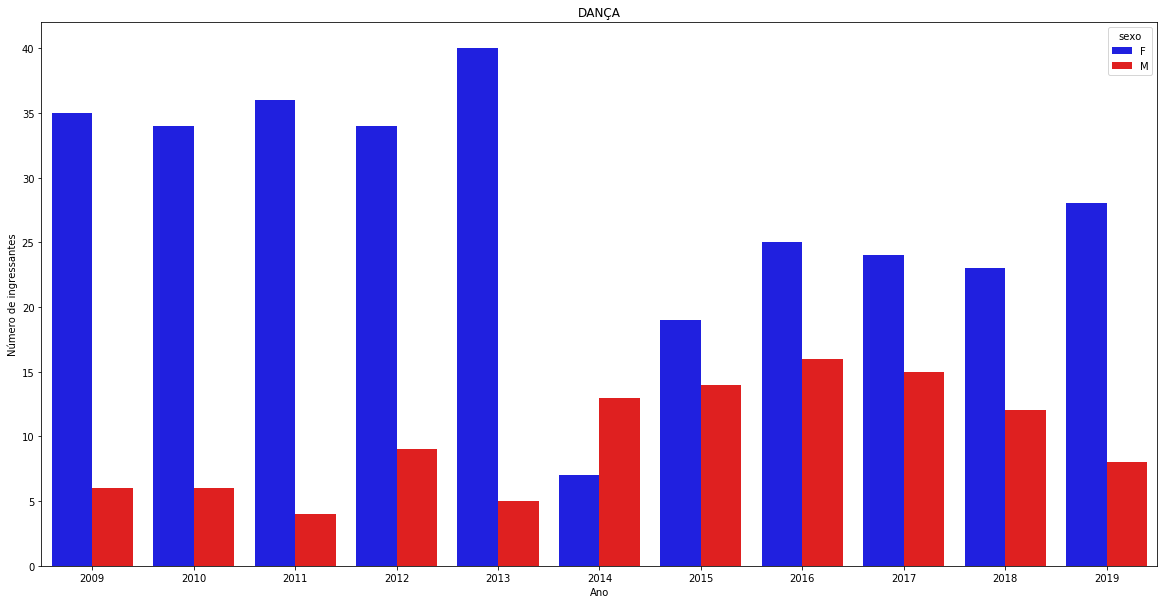

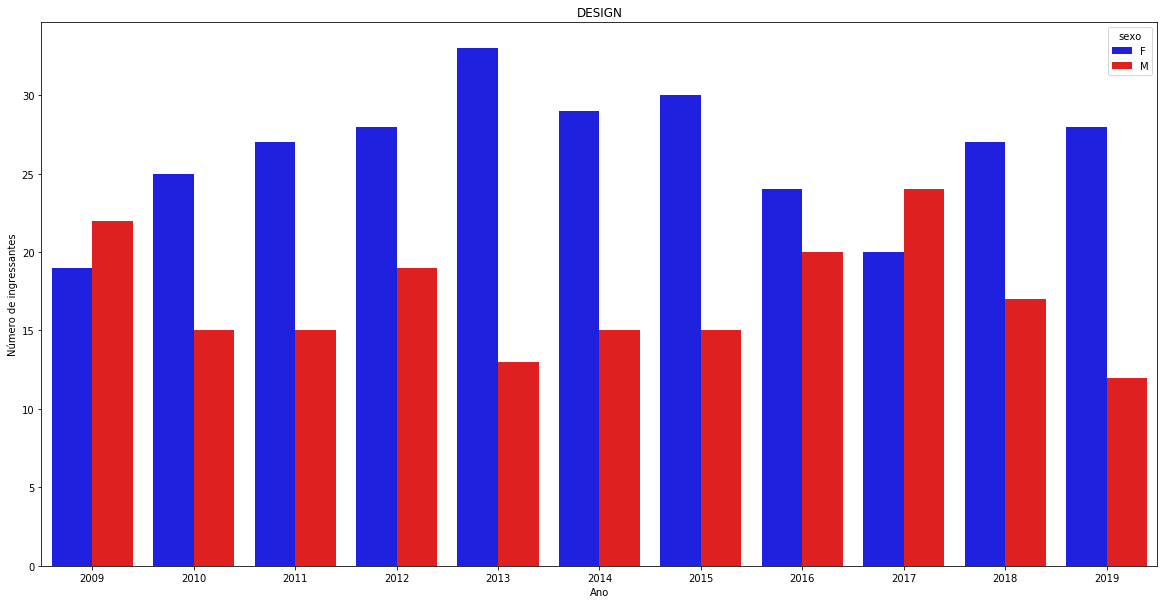

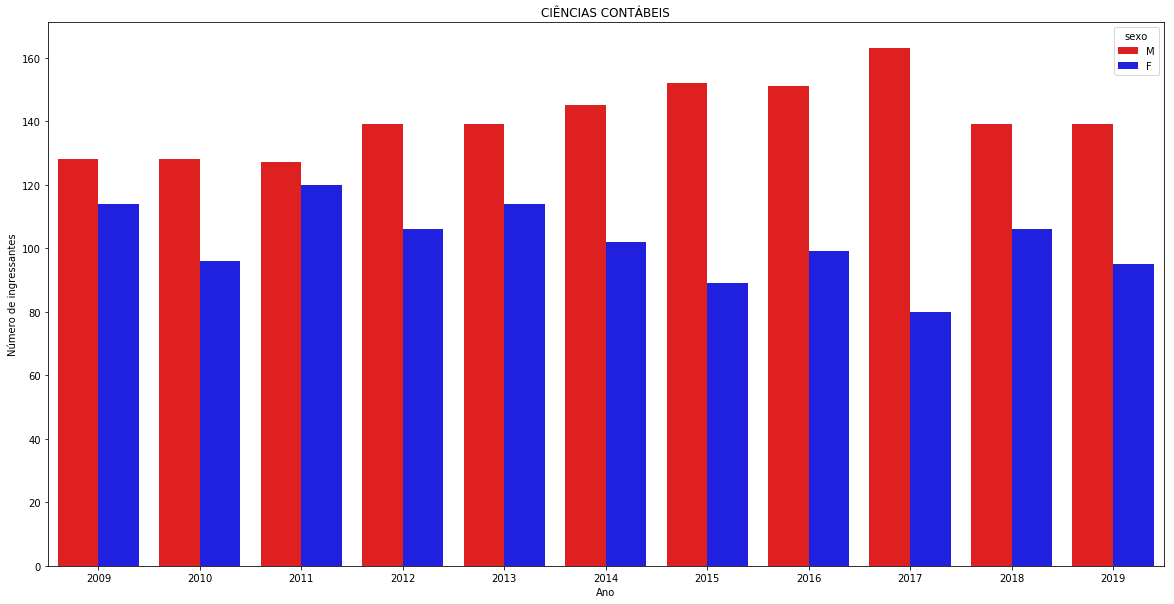

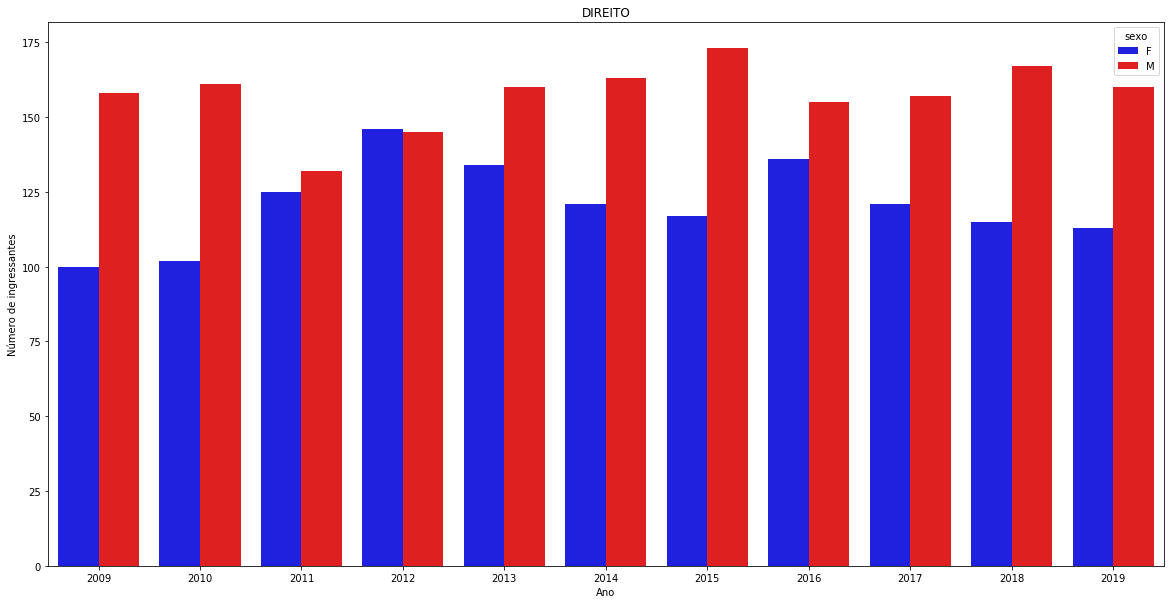

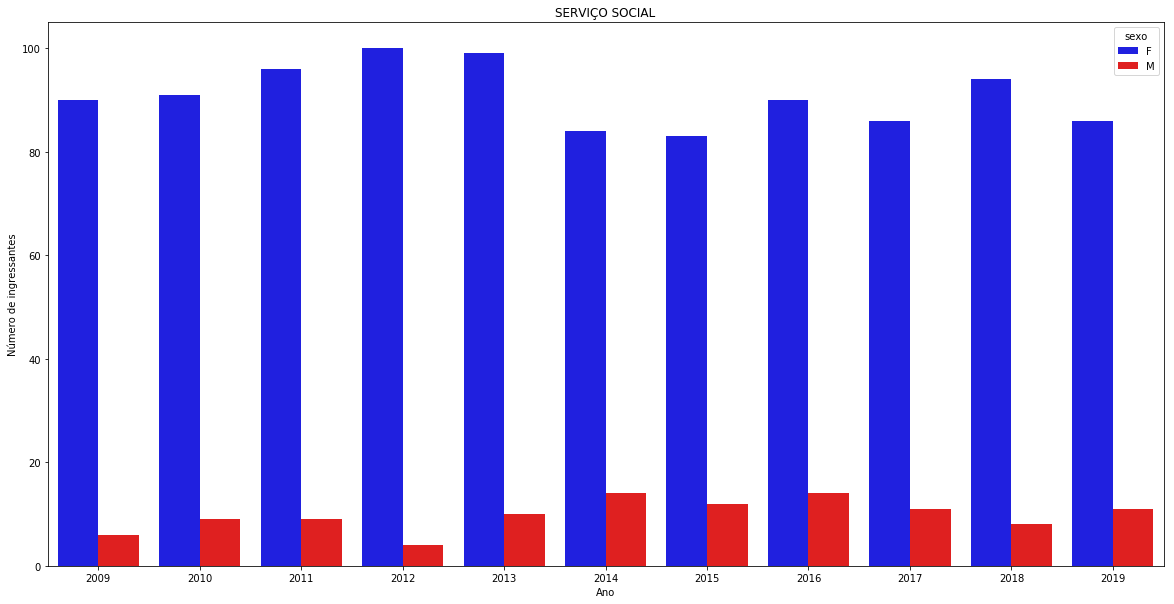

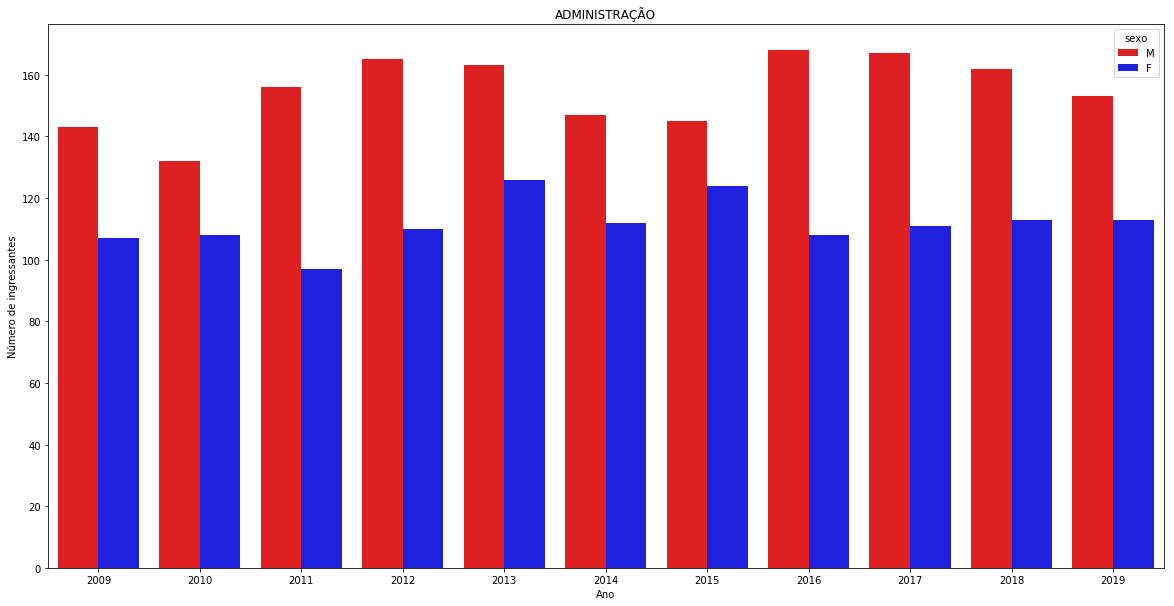

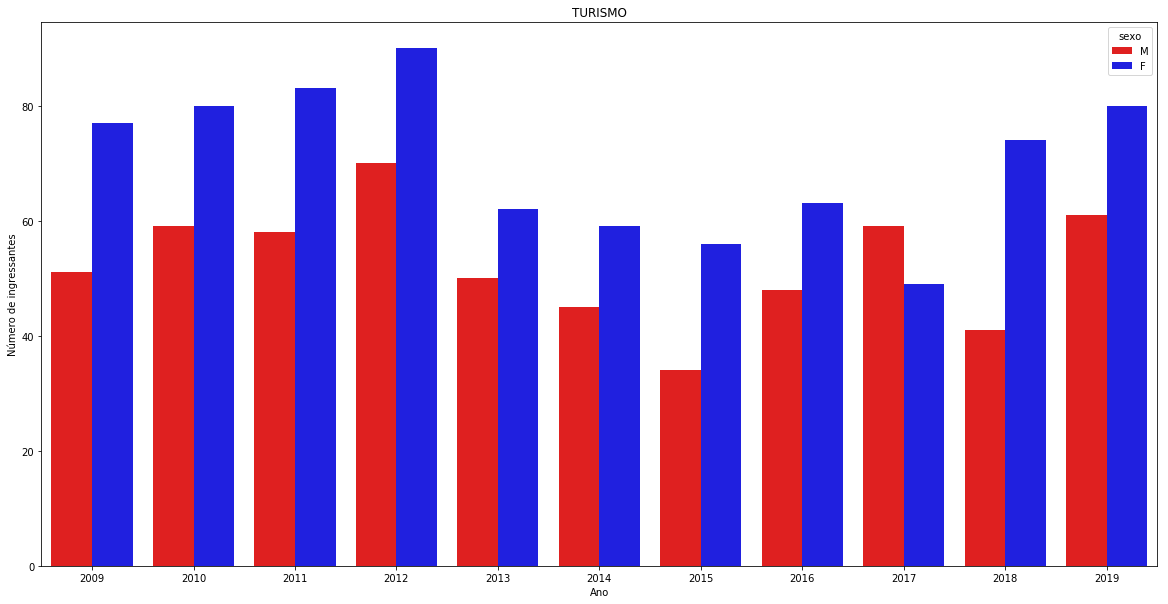

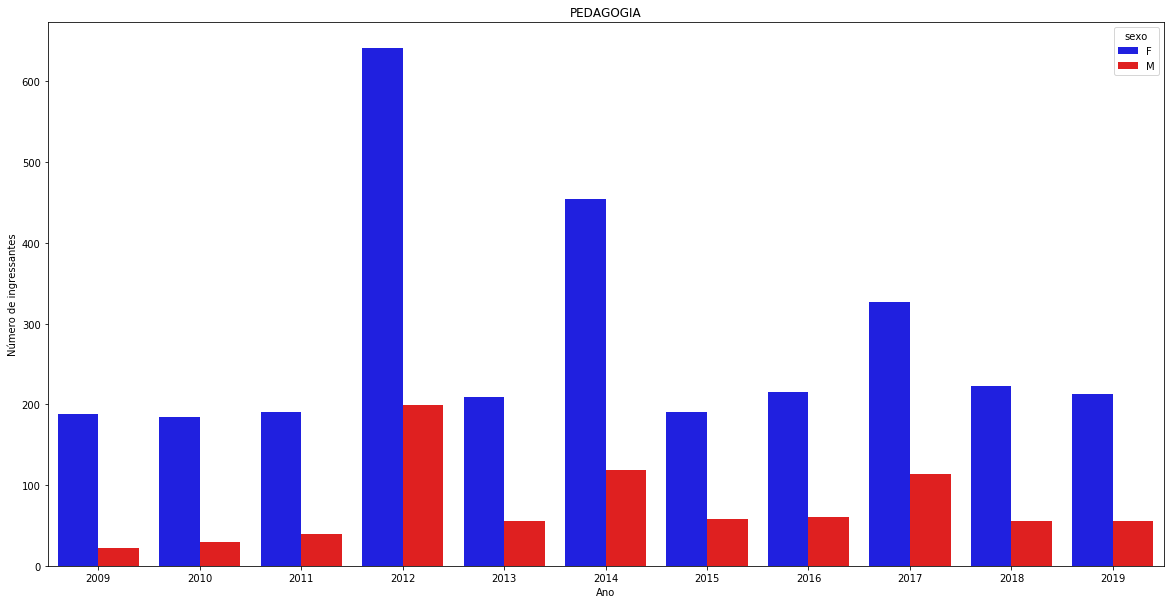

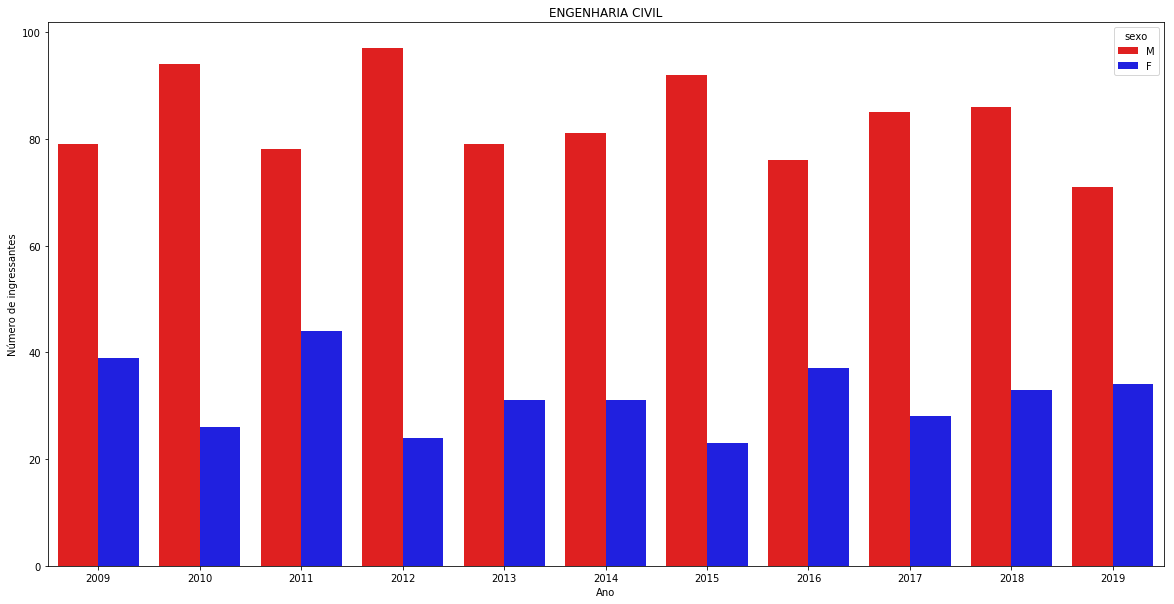

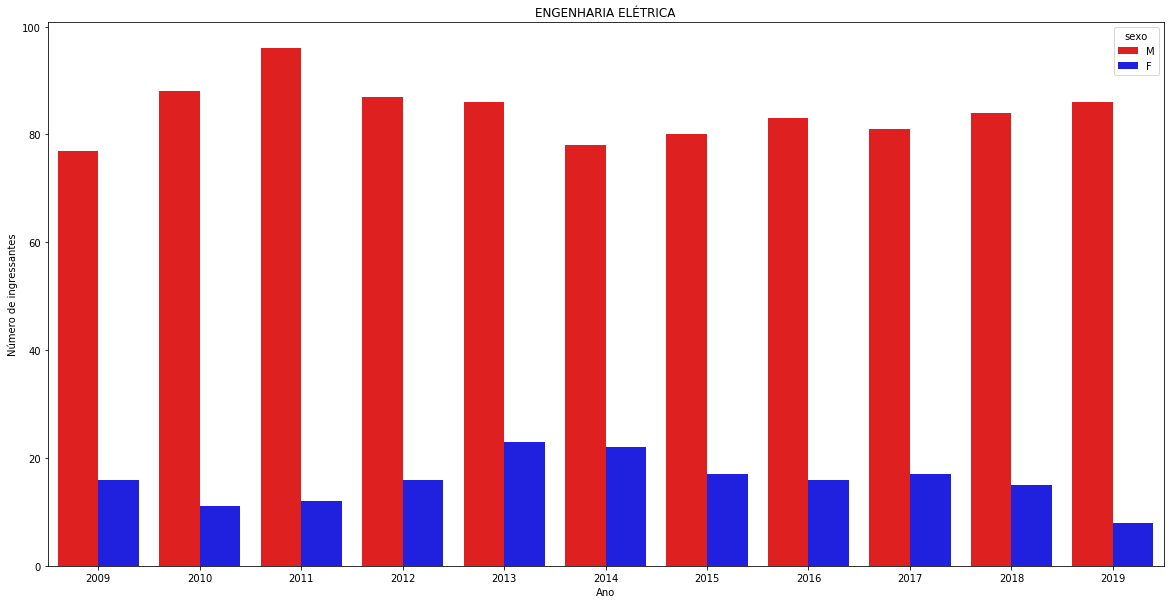

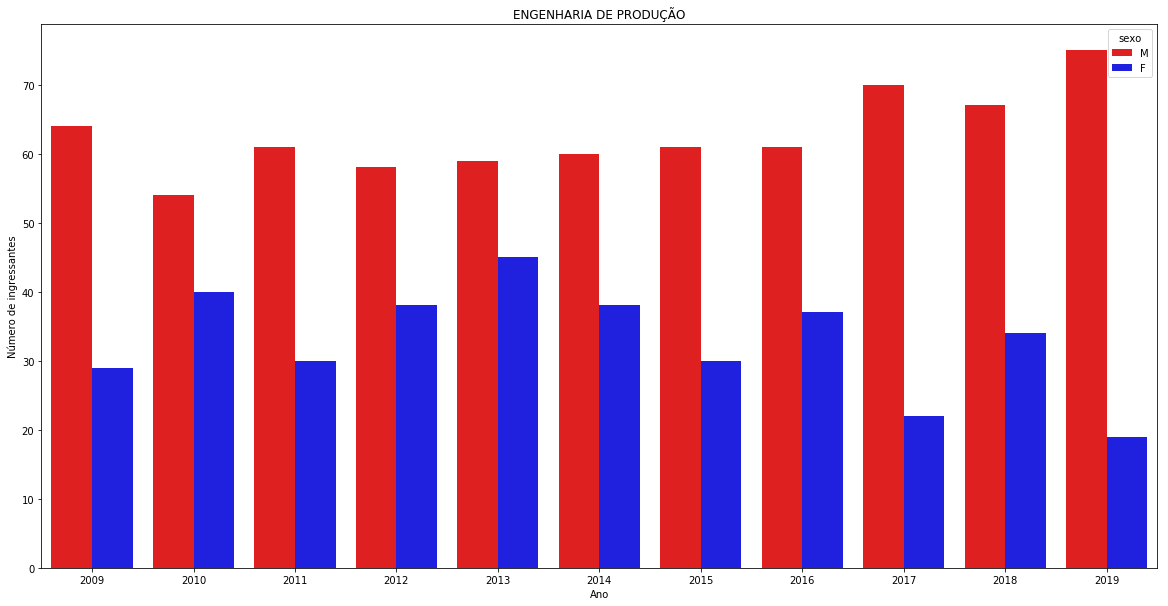

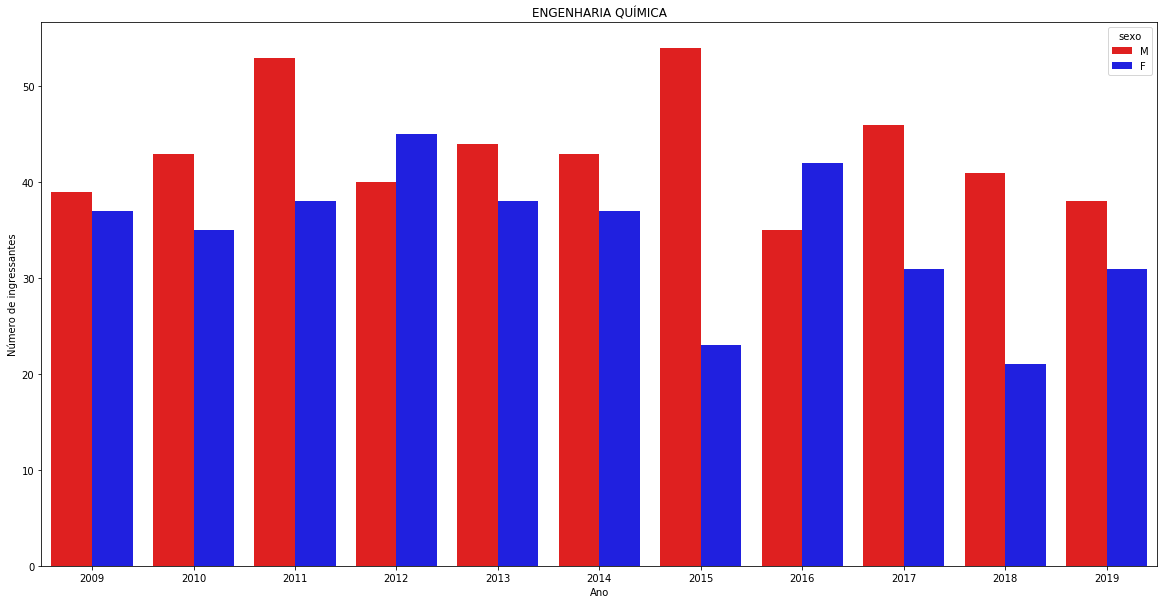

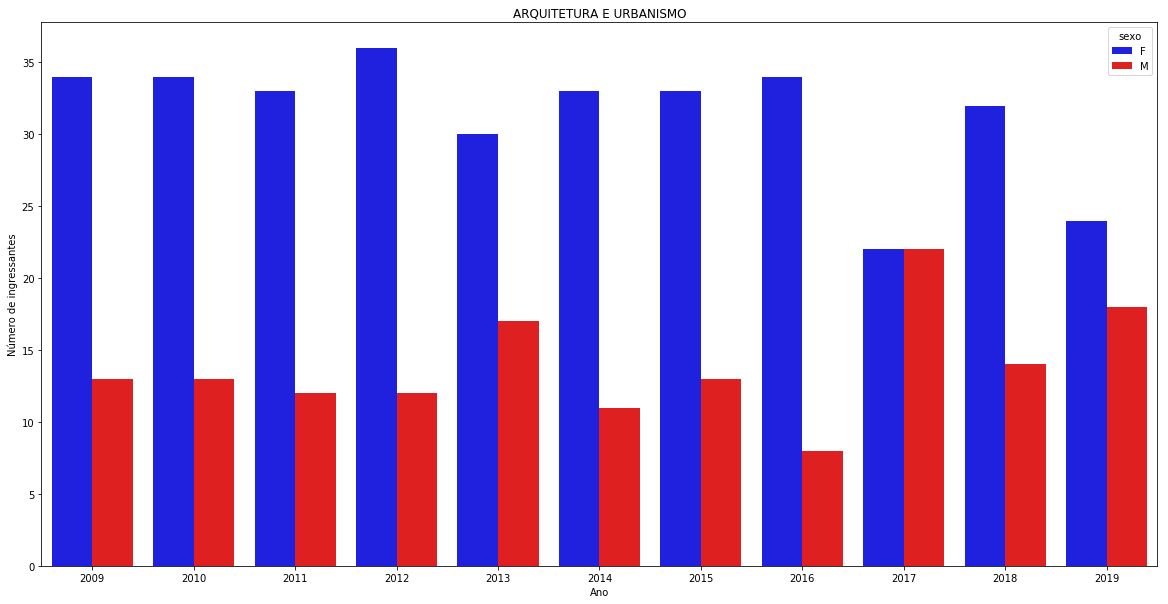

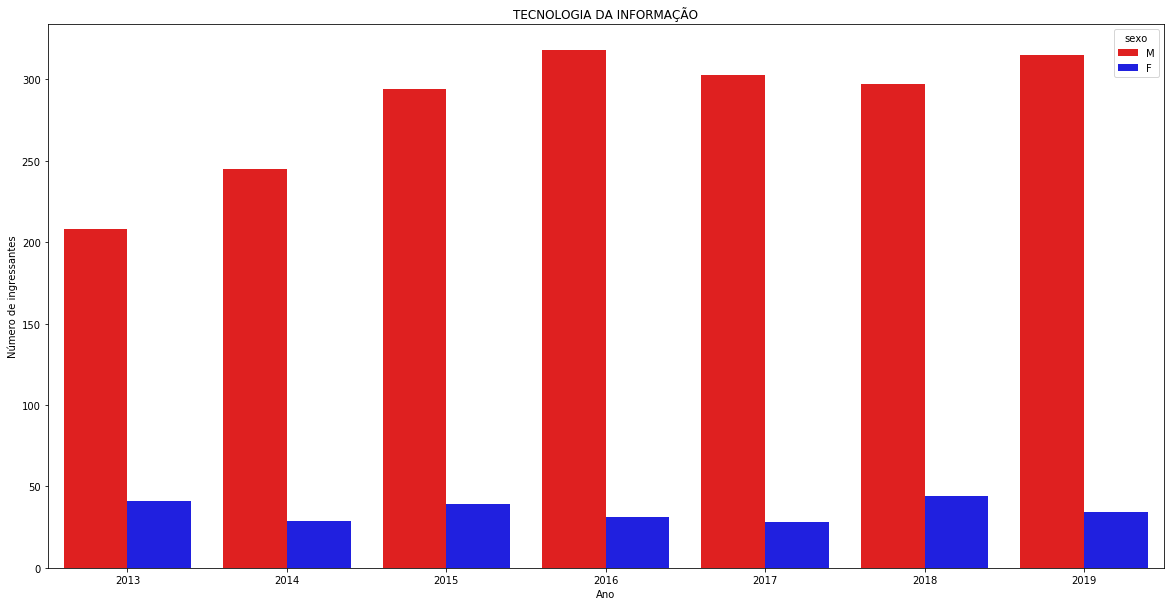

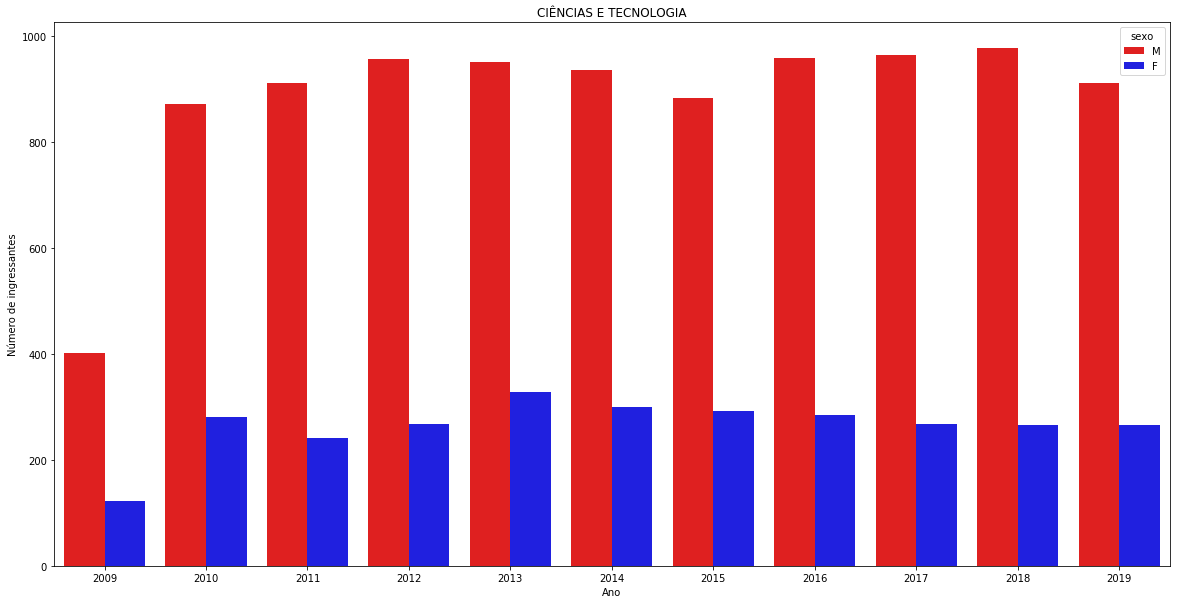

In [28]:
colors = {'M':'red', 'F':'blue'}

fig, ax = plt.subplots(figsize=(20,10))
plt.title('GRÁFICO GERAL')
ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = graduation_sex, palette = colors)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de ingressantes')
plt.show()

for i in range(32):
  course = graduation_sex.loc[graduation_sex['nome_curso'] == courses[i]]
  fig, ax = plt.subplots(figsize=(20,10))
  plt.title(courses[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = course, palette = colors)
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de ingressantes')
  plt.show()

- **Com as análises dos cursos de graduação feitas, agora vamos aos cursos de pós graduação, e analogamente, selecionar apenas os estudantes da pós, e também listar os cursos selecionados (cursos selecionados no arquivo README.txt).**

In [0]:
dataset_pos = dataset.loc[(dataset['nivel_ensino'] == 'MESTRADO') | (dataset['nivel_ensino'] == 'DOUTORADO')]
courses_pos = ["MESTRADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO", "DOUTORADO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO","MESTRADO EM SISTEMAS E COMPUTAÇÃO", "DOUTORADO EM CIÊNCIA DA COMPUTAÇÃO","MESTRADO PROFISSIONAL EM ENGENHARIA DE SOFTWARE","MESTRADO PROFISSIONAL EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS","MESTRADO EM BIOINFORMÁTICA", "DOUTORADO EM BIOINFORMÁTICA"]
pos_graduation = dataset_pos.loc[dataset_pos['nome_curso'].isin(courses_pos)]

- **Também analogamente a graduação, eliminar as linhas que o sexo e a raça não esteja informada**

In [0]:
pos_graduation_sex = pos_graduation.loc[pos_graduation['sexo'] != 'N']
pos_graduation_raca = pos_graduation.loc[pos_graduation['raca'] != 'Não Informado']

- **Agora vamos fazer a comparação de etnias na pós graduação.**

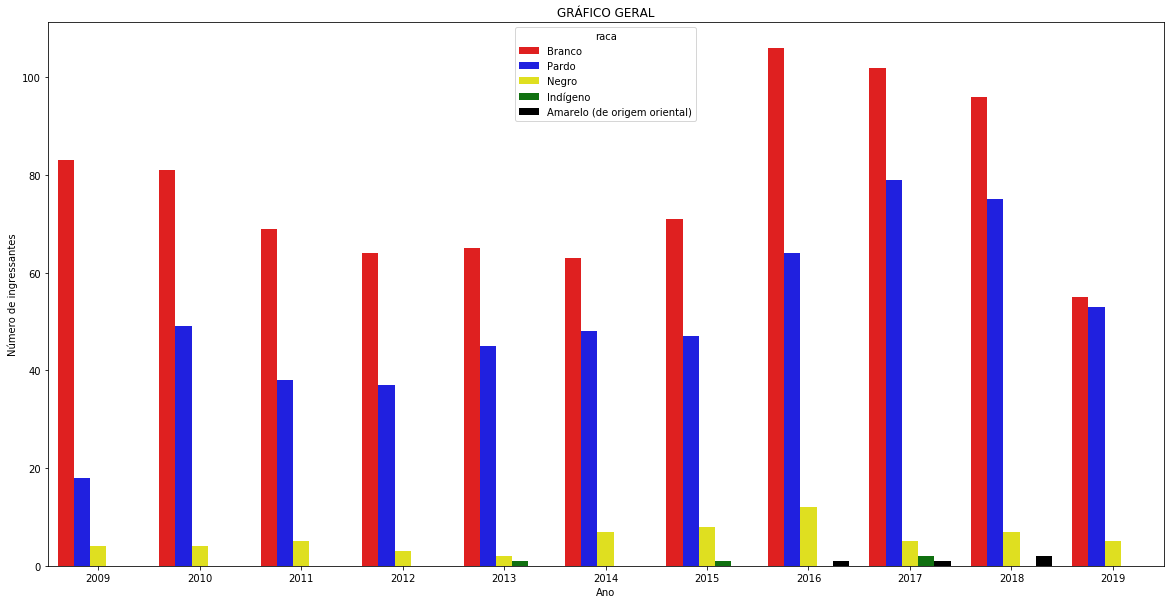

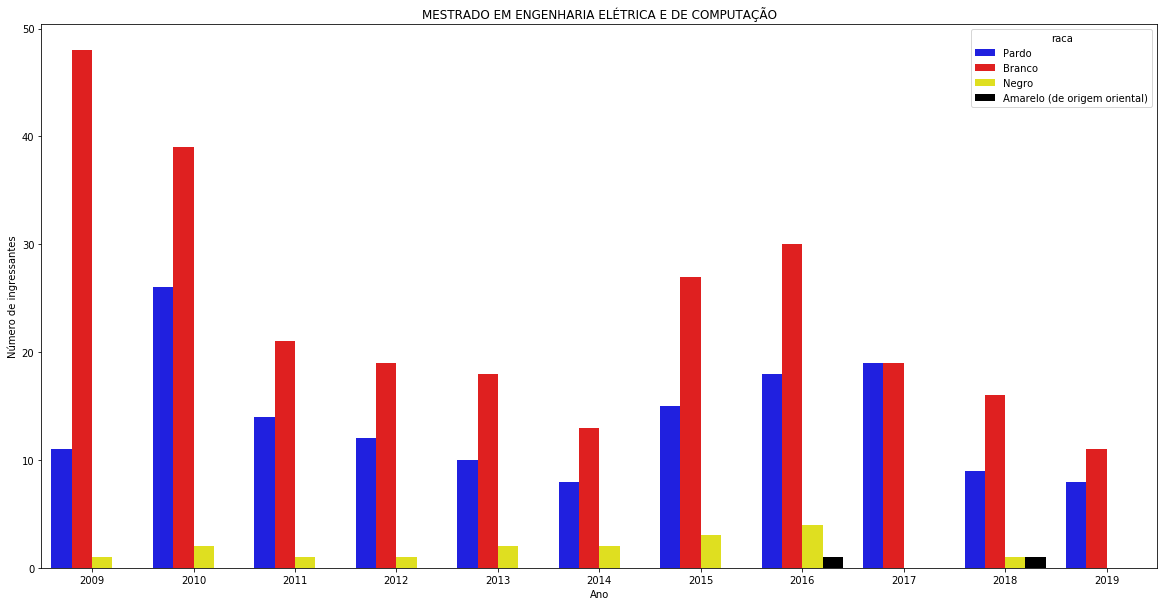

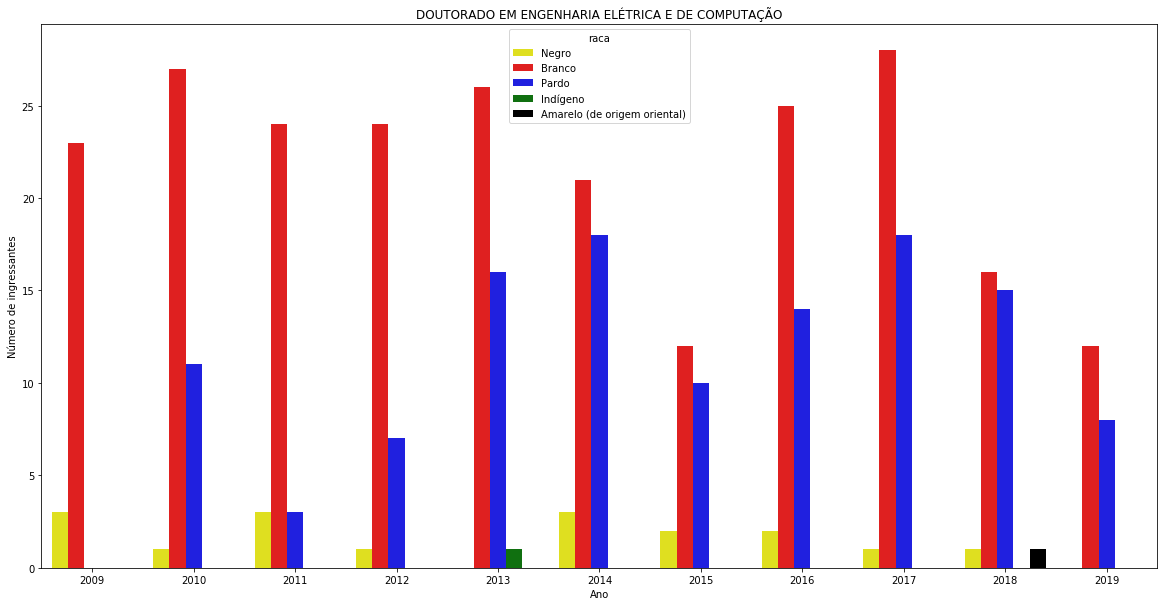

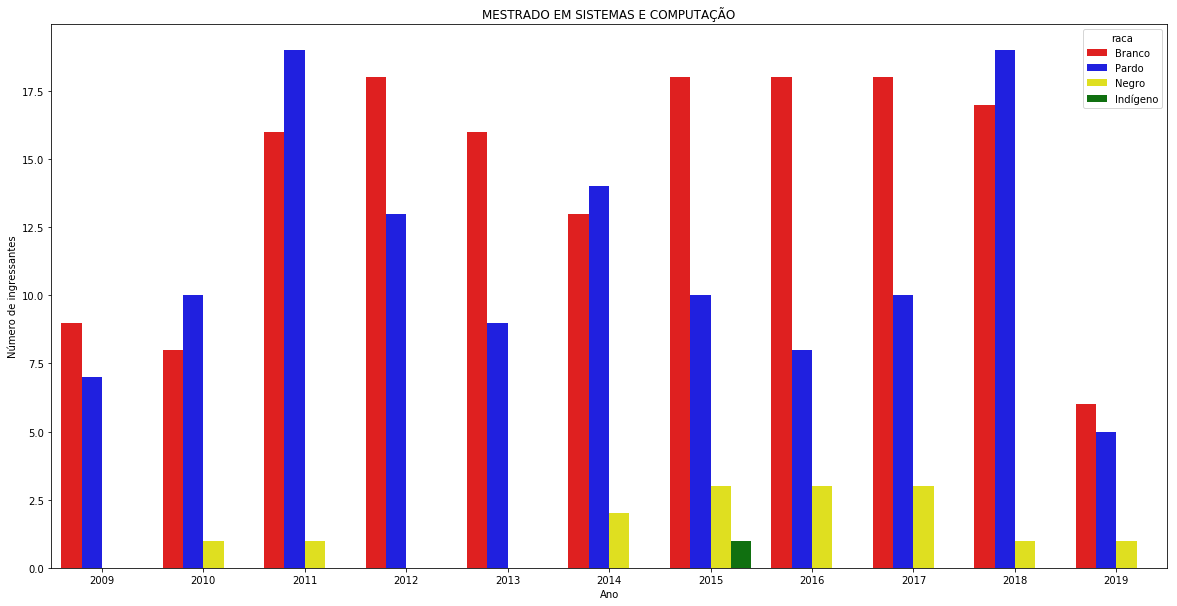

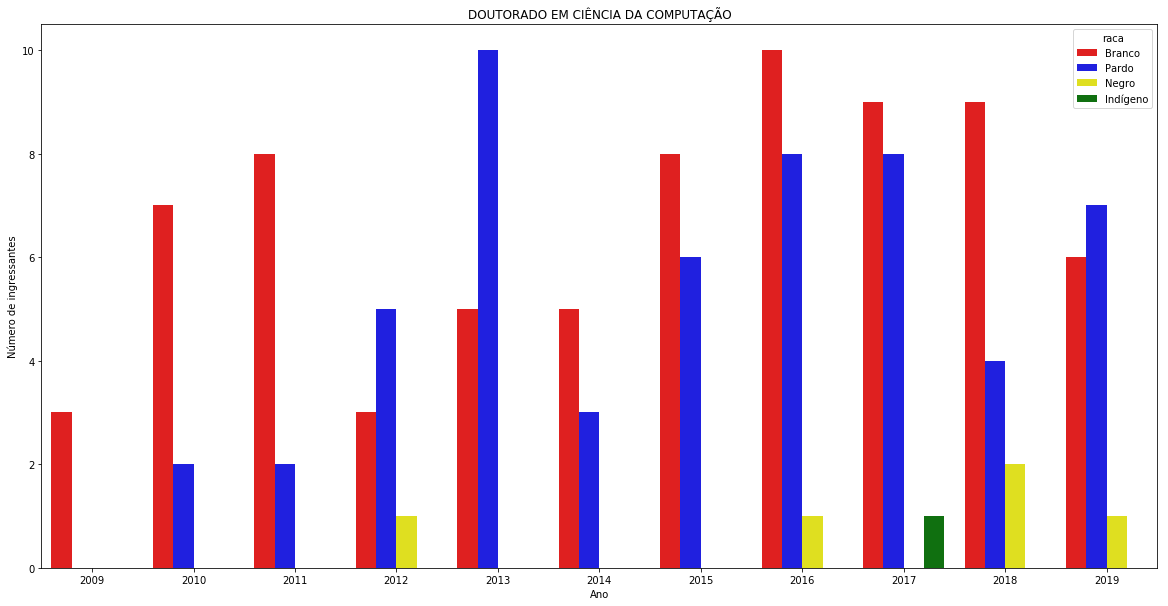

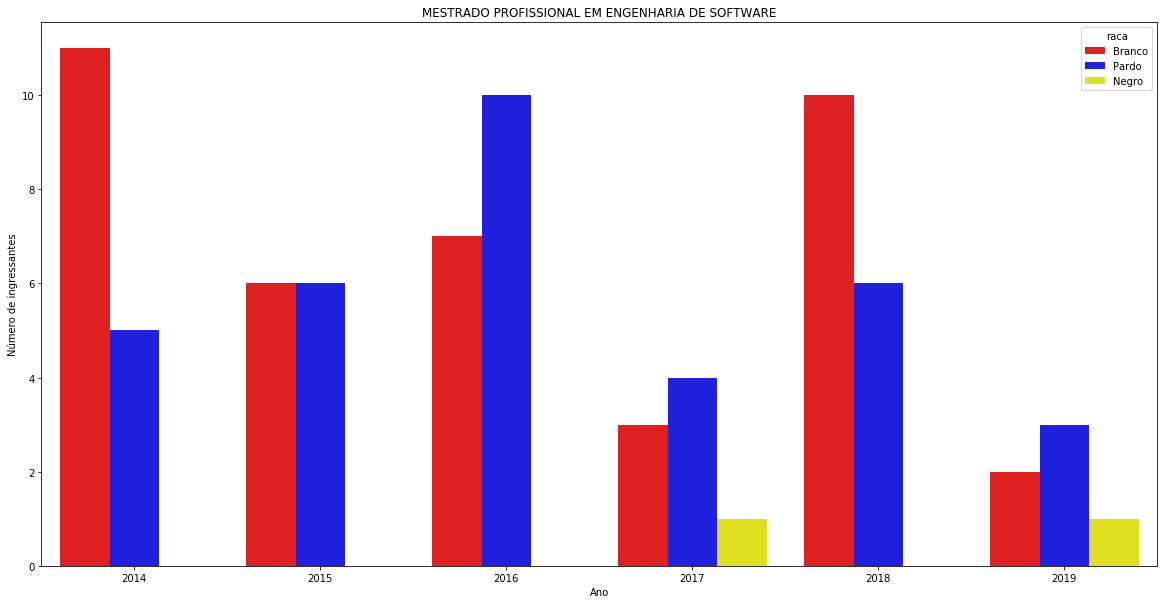

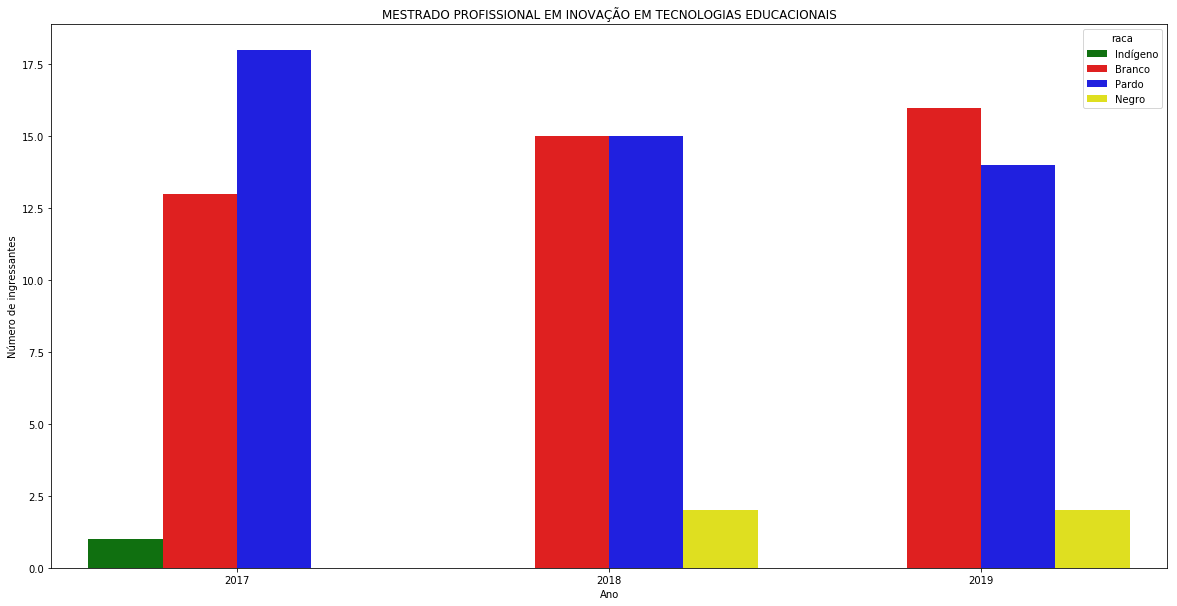

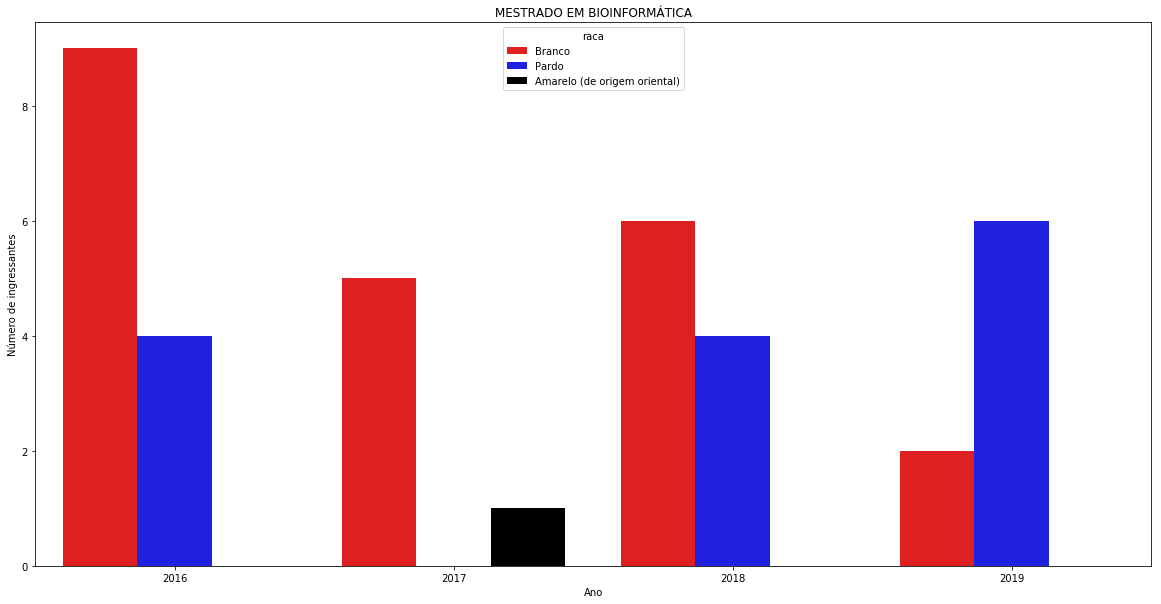

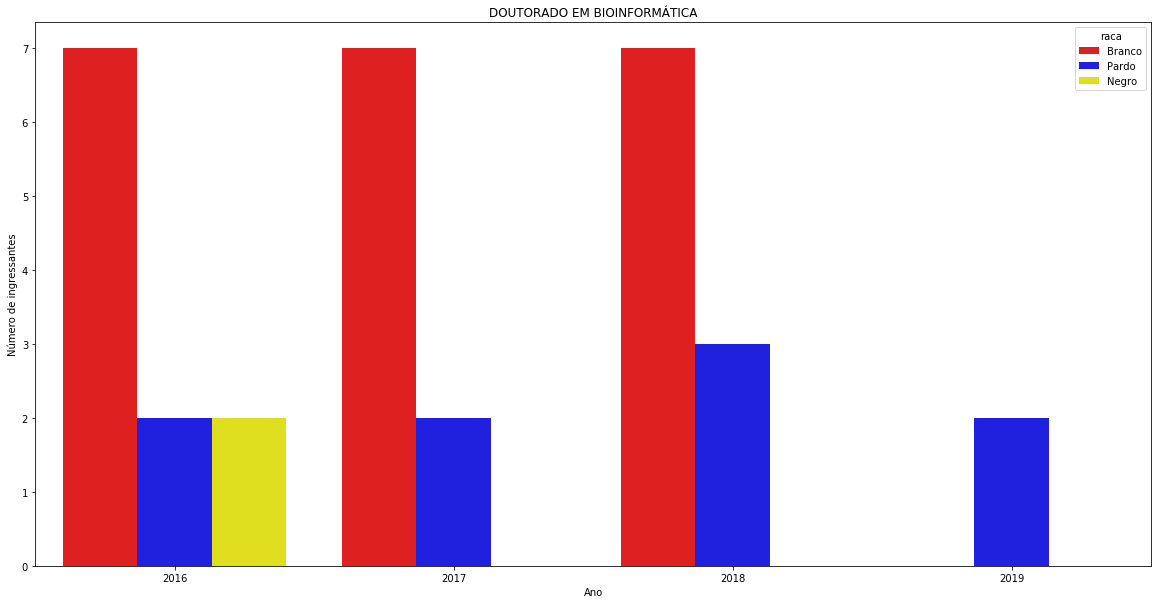

In [29]:
colors = {"Pardo":"blue", "Branco":"red", "Negro":"yellow", "Amarelo (de origem oriental)":"black", "Indígeno":"green", "Remanescente de quilombo":"cyan"}

fig, ax = plt.subplots(figsize=(20,10))
plt.title('GRÁFICO GERAL')
ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = pos_graduation_raca, palette = colors)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de ingressantes')
plt.show()

for i in range(8):
  pos_course = pos_graduation_raca.loc[pos_graduation_raca['nome_curso'] == courses_pos[i]]
  fig, ax = plt.subplots(figsize=(20,10))
  plt.title(courses_pos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = pos_course, palette = colors)
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de ingressantes')
  plt.show()

- **E por fim, a comparação dos sexos.**

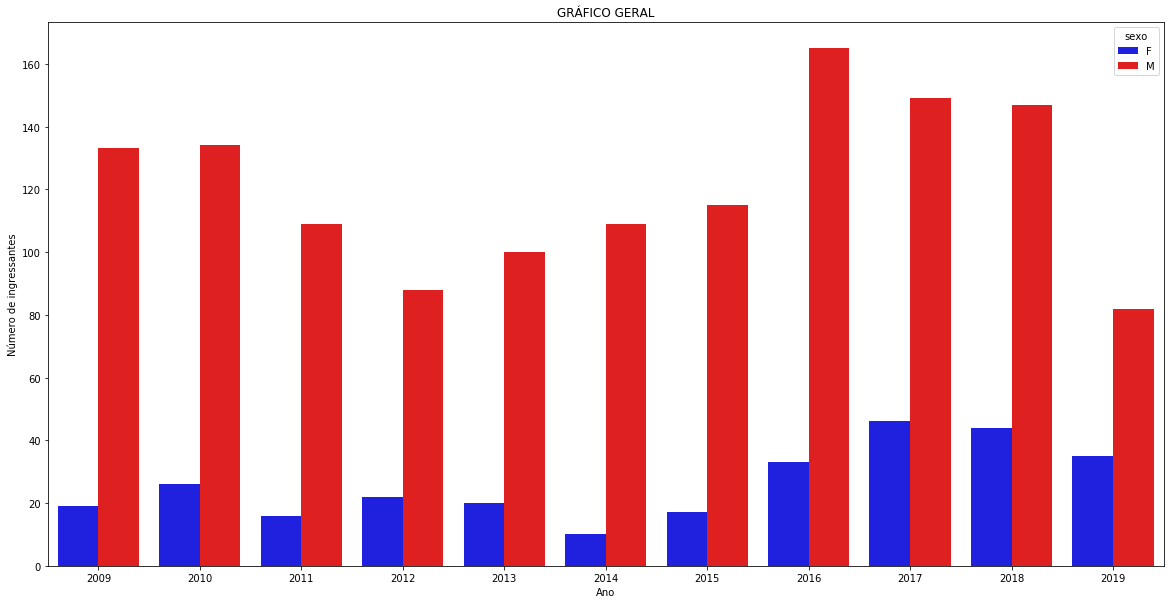

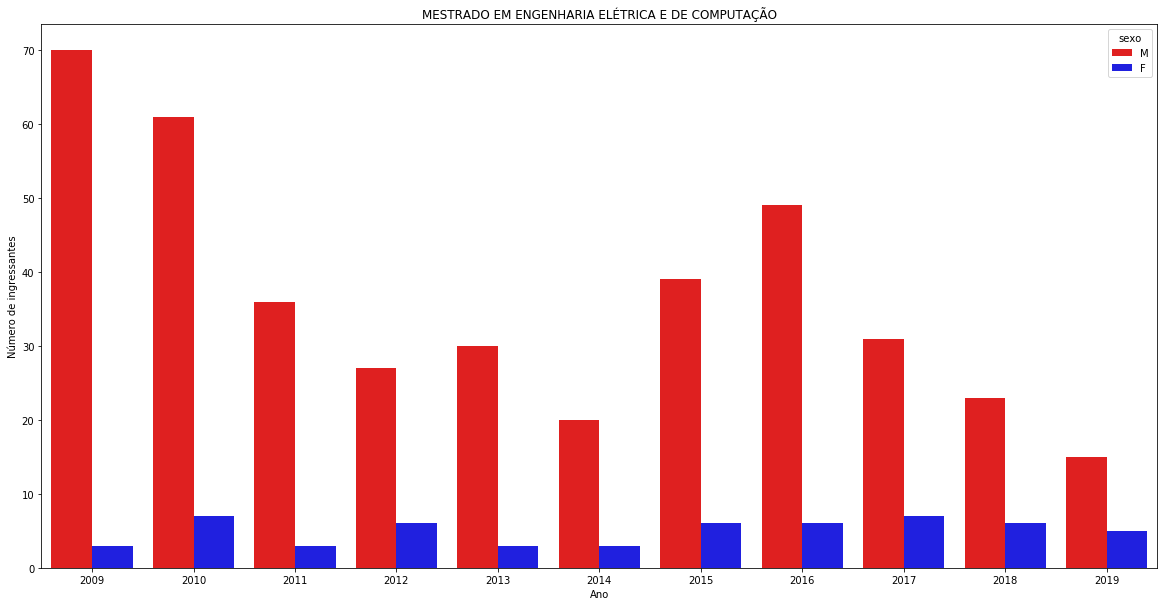

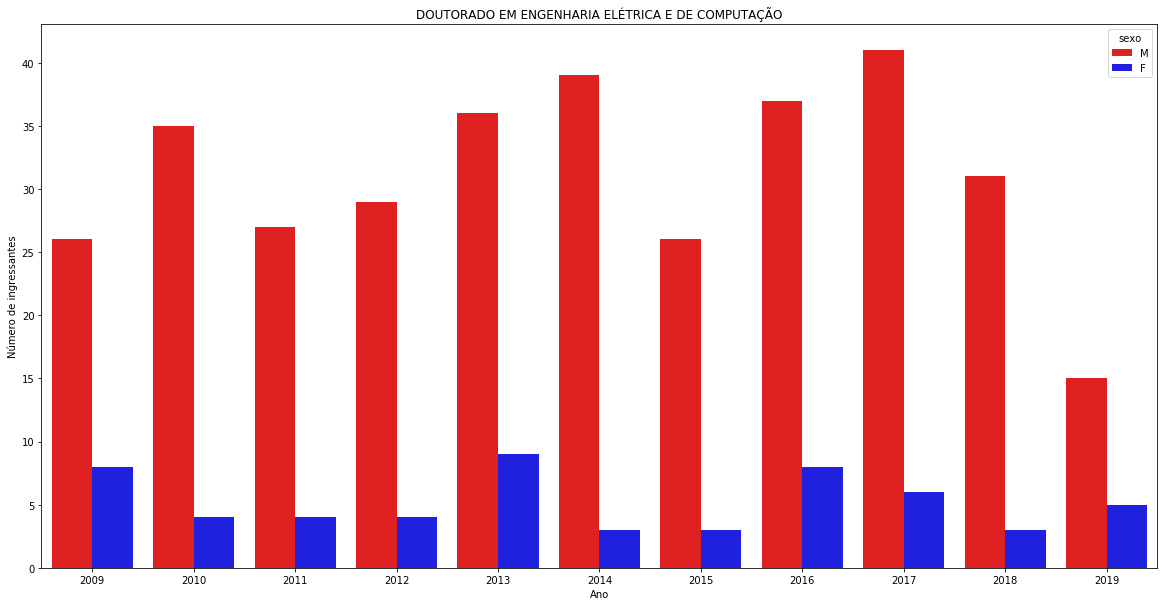

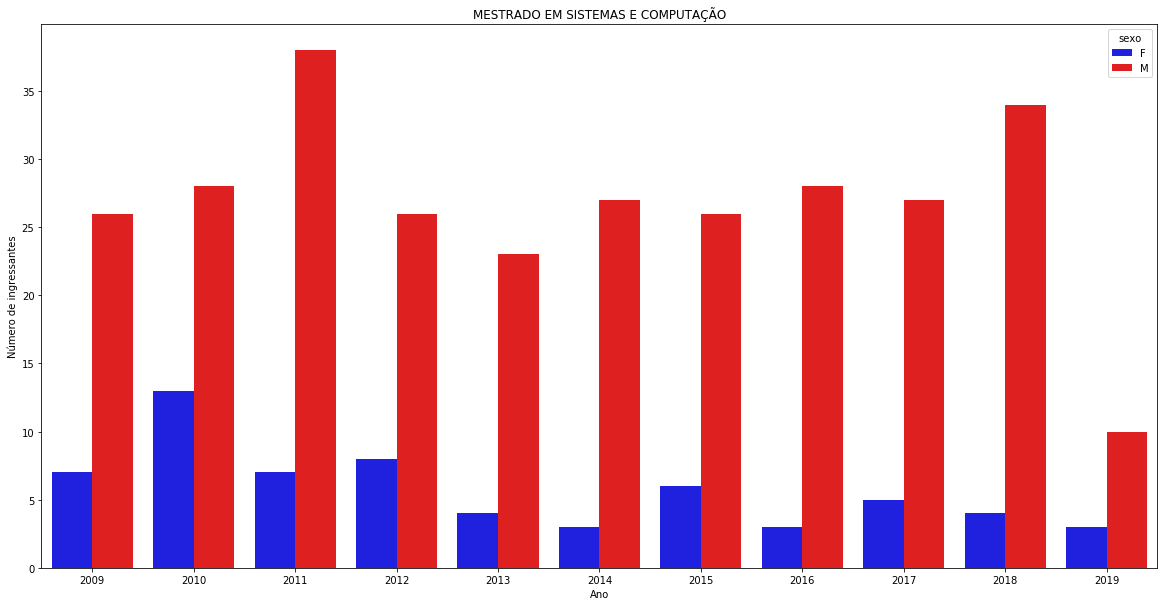

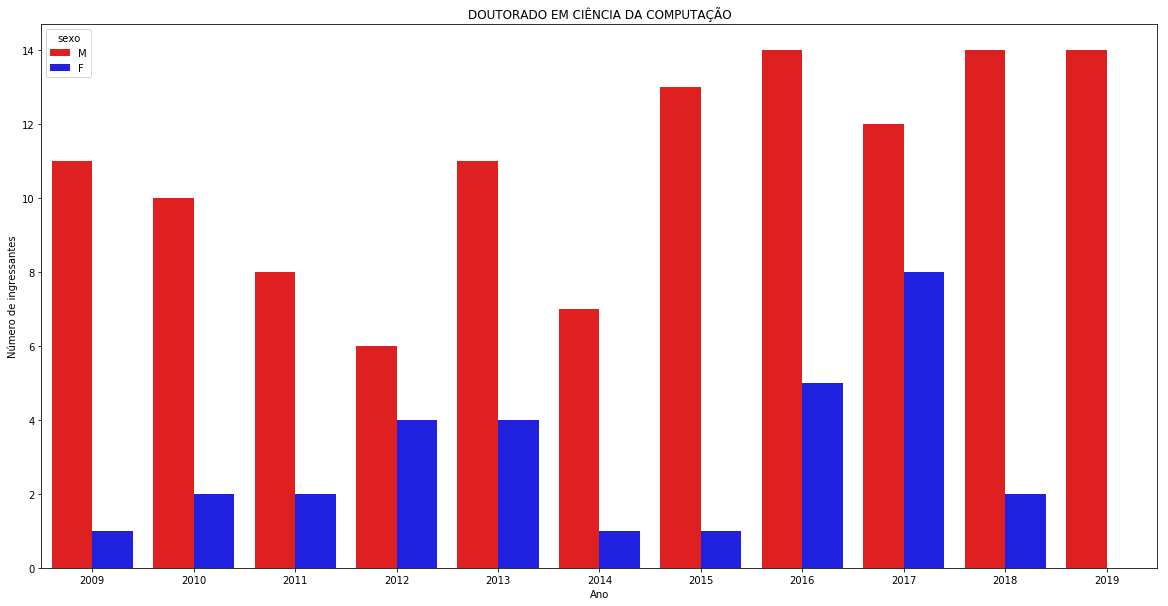

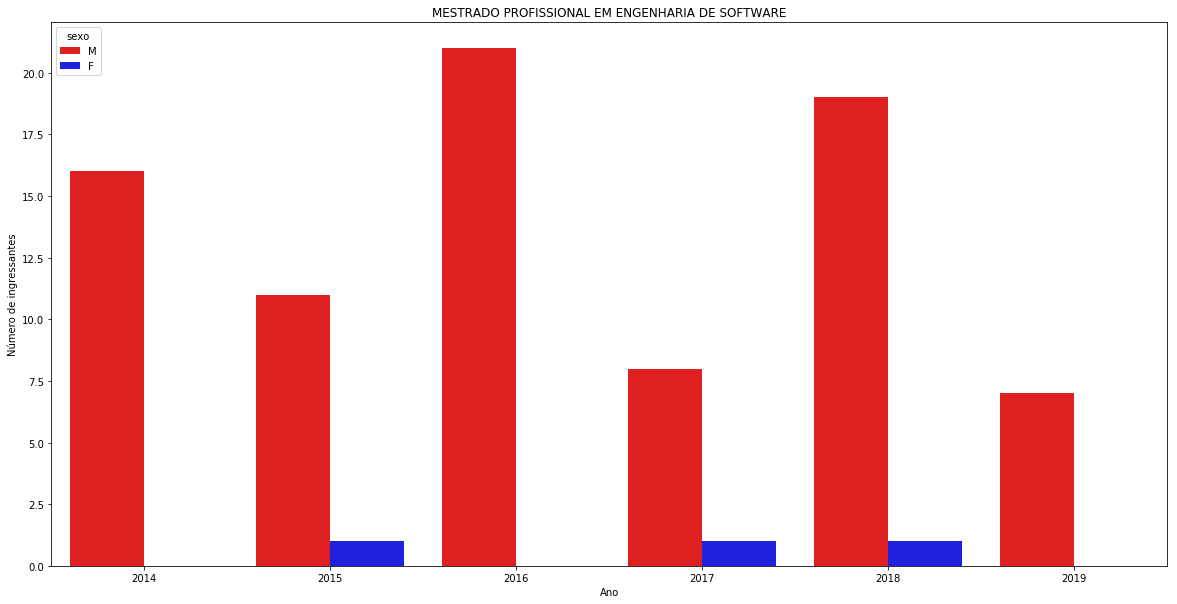

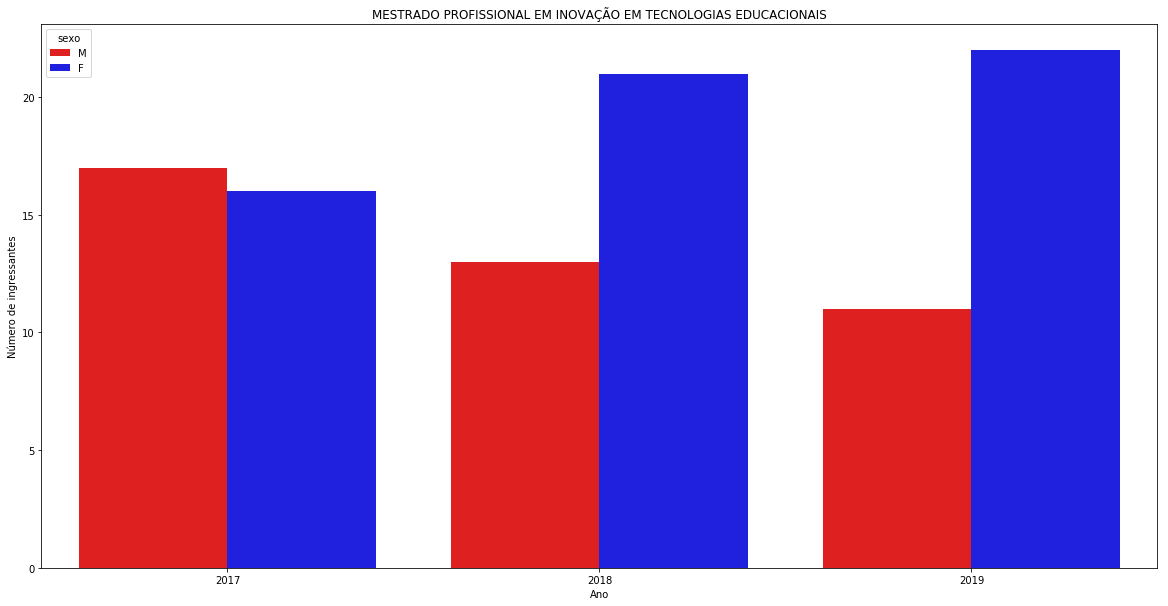

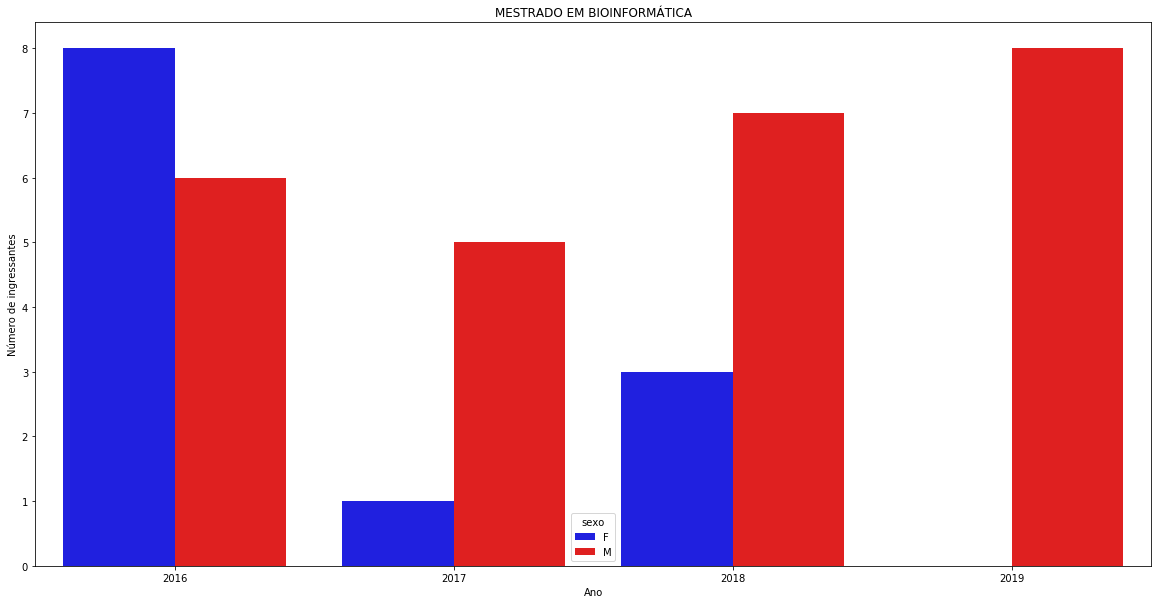

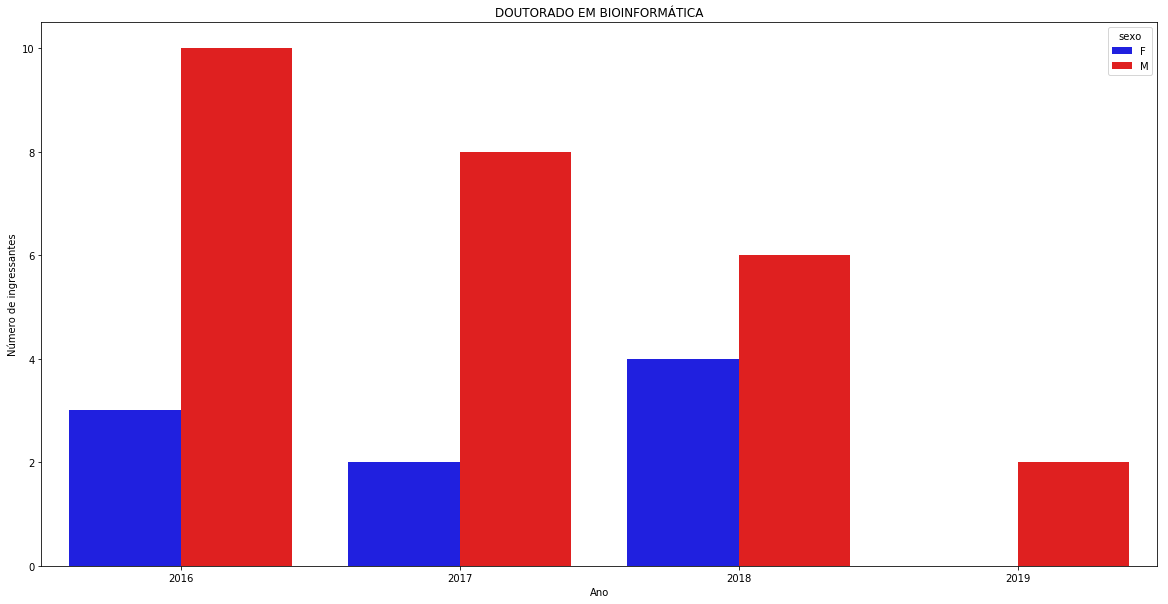

In [30]:
colors = {'M':'red', 'F':'blue'}

fig, ax = plt.subplots(figsize=(20,10))
plt.title('GRÁFICO GERAL')
ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = pos_graduation_sex, palette = colors)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de ingressantes')
plt.show()

for i in range(8):
  pos_course = pos_graduation_sex.loc[pos_graduation_sex['nome_curso'] == courses_pos[i]]
  fig, ax = plt.subplots(figsize=(20,10))
  plt.title(courses_pos[i])
  ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = pos_course, palette = colors)
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de ingressantes')
  plt.show()